# Chicago PD Arrest and TRR Data Analysis!
## Logan Chang and Robert Yu
## 07/16/20

Welcome to our notebook! We have collected and cleaned data from the Chicago PD regarding the arrests, reported crimes, and TRR incidents that the police department has collected between 2004 and 2016. Note, however, this is an active notebook and data and analyis are constnatly being added, edited, and refined. Please feel free to scroll through our preliminary findings and note any comments/concerns/suggestions about our data. We initially began this project in the wake of Mr. George Floyd's death and wanted to dive deeper into the statistics behind police brutality and systemic racism. Our hearts go out to the families and loved ones of all victims of police brutality and systemic racism, here and around the world, as we stand with our brothers and sisters in the movement for change and reform.  Enjoy! - Logan and Robert

*Note to the Reader:  If the past few months have taught us anything, it's that our city's police department's are far from equitable. With that in mind, realize our data was collected directly from the Chicago PD public records website, with all of our data being official police reports filled out by police and filed by police. Take our data with that caveat in mind. We seek not to divide, rather, to inform.*

Some jargon you'll encounter: 

* TRR Incident: A tactical response report incident; A TRR documents the actions of an officer and civilian subject in an encounter where the officer used a substantial physical force or the civilian alleged that they were injured by the officer. 
* Subject: The civilian(s) involved in a TRR incident
* Member: The police officer(s) involved in a TRR incident
* District: The Chicago PD is split into 22 distinct regional police districts. The officers in each district are responsible only to their district, but all officers comprise the greater Chicago Police Force. We only have 'Beat' data, but the first two digits of a 4-digit beat and the first digit of a 3 digit beat will represent which beat that district is in. (i.e. Beat '123' is in District 1, and is Beat 23 within District 1).
* Beat: the territory and time that a police officer patrols. Think of these as sub-districts of each of the 22 police districts. We only have 'Beat' data, but the first two digits of a 4-digit beat and the first digit of a 3 digit beat will represent which beat that district is in. (i.e. Beat '123' is in District 1, and is Beat 23 within District 1).
* Ratio: 'Ratio' is a term we use for the ratio of arrests to crimes in each beat. It is mathematically equivalent to the percentage of arrests to reported crimes, as all arrests are reported crimes
* Assault: act which causes the victim to apprehend imminent physical harm. It’s a threat—real or implied—of a battery, or an incomplete battery.
* Battery: the actual act causing the physical harm

In [1]:

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math
from collections import OrderedDict 
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
N = 10
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-cpp-data/df_beat_clean.csv
/kaggle/input/clean-cpp-data/df_subject_id.csv
/kaggle/input/clean-cpp-data/df_trr_by_beat_clean.csv
/kaggle/input/clean-cpp-data/df_trr_id_final-2.csv


Load in Dataframes:

In [2]:
df_beat = pd.read_csv('/kaggle/input/clean-cpp-data/df_beat_clean.csv')
df_subject_id = pd.read_csv('/kaggle/input/clean-cpp-data/df_subject_id.csv')
df_trr_by_beat = pd.read_csv('/kaggle/input/clean-cpp-data/df_trr_by_beat_clean.csv')
df_trr_id = pd.read_csv('/kaggle/input/clean-cpp-data/df_trr_id_final-2.csv')

Preview our data:

In [3]:
df_beat.columns

Index(['beat', 'number_of_reported_crimes', 'arrests_by_beat'], dtype='object')

In [4]:
df_beat.head()

,beat,number_of_reported_crimes,arrests_by_beat
0,423,31784,9912
1,421,30970,9968
2,624,28946,10451
3,1533,28633,15282
4,823,27745,8754


In [5]:
df_subject_id.columns

Index(['subject_ID', 'list_of_trr_id', 'gender', 'race', 'age'], dtype='object')

In [6]:
df_subject_id.head()

,subject_ID,list_of_trr_id,gender,race,age
0,1.0,"4,5,",MALE,HISPANIC,38.0
1,2.0,"7,8,",MALE,BLACK,25.0
2,3.0,"9,",MALE,BLACK,24.0
3,4.0,"10,",MALE,BLACK,21.0
4,5.0,"11,12,",MALE,BLACK,21.0


In [7]:
df_trr_by_beat.columns

Index(['beat', 'number_of_trr_reports', 'list_of_trr_ids'], dtype='object')

In [8]:
df_trr_by_beat.head()

,beat,number_of_trr_reports,list_of_trr_ids
0,111,141,"786,3722,3723,3724,3725,3727,8771,8772,8773,97..."
1,112,67,"279,280,2947,10483,12117,12214,18725,18726,203..."
2,113,136,"737,1028,1029,8204,8205,13050,13740,16963,1698..."
3,114,78,"68897,70202,71493,71566,71896,72098,72101,7211..."
4,121,13,"70909,76212,76706,80616,82312,86627,86629,9197..."


In [9]:
df_trr_id.columns

Index(['trr_id', 'sr_no', 'se_no', 'beat', 'party_fired_first', 'taser',
       'firearm_used', 'trr_year', 'weapon_discharge_yn', 'list_of_subcats',
       'list_of_cats', 'number_of_member_actions', 'number_of_subject_actions',
       'highest_resistance_level', 'list_of_subject_actions',
       'subject_pulled_away', 'subject_disobey_verbal', 'subject_stiffened',
       'subject_fled', 'subject_attack_no_weapon', 'subject_battery_threat',
       'subject_had_weapon', 'subject_attack_with_weapon',
       'subject_deadly_force', 'subject_other', 'subject_armed', 'injured',
       'alleged_injury', 'subject_no', 'event_id'],
      dtype='object')

In [10]:
df_trr_id.head(10)

,trr_id,sr_no,se_no,beat,party_fired_first,taser,firearm_used,trr_year,weapon_discharge_yn,list_of_subcats,...,subject_battery_threat,subject_had_weapon,subject_attack_with_weapon,subject_deadly_force,subject_other,subject_armed,injured,alleged_injury,subject_no,event_id
0,4,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
1,5,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
2,7,2.0,2.0,1131,NaN,0,0,2004,1,"4.1,4.2,",...,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,2
3,8,2.0,2.0,1131,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,2
4,9,3.0,3.0,1112,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,0,3.0,3
5,10,4.0,4.0,1134,NaN,0,0,2004,0,"3.3,3.3,3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,0,4.0,4
6,11,5.0,5.0,1134,NaN,0,0,2004,0,"3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,0,4.0,5
7,12,5.0,5.0,1134,NaN,0,0,2004,0,"3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,0,4.0,5
8,13,6.0,6.0,1121,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,5.0,6
9,14,7.0,7.0,1122,NaN,0,0,2004,0,"3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,1,6.0,7


# BEAT DATA

20 beats with highest and lowest # of reported crimes, arrests, and arrest:crime ratio

Starting with Reported Crimes:

In [11]:
#table of 20 beats with highest reported number of crimes
df_beat.sort_values(by = 'number_of_reported_crimes', ascending = False, inplace = True)
df_beat.head(20)

,beat,number_of_reported_crimes,arrests_by_beat
0,423,31784,9912
1,421,30970,9968
2,624,28946,10451
3,1533,28633,15282
4,823,27745,8754
5,511,27279,7120
6,1112,26929,14231
7,1522,26615,13453
8,2533,26351,12648
9,414,25649,6398


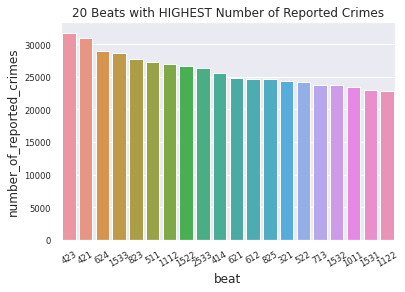

In [12]:
#graph of above table
top20_beat = df_beat.beat[:20]
#print(top20_beat)
top20_crime = df_beat.number_of_reported_crimes[:20]
sns.set(font_scale = 1)
ax = sns.barplot(x = top20_beat, y = top20_crime, order = top20_beat, label = 'small')
ax.set_title('20 Beats with HIGHEST Number of Reported Crimes')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
plt.show()

The 20 beats with the lowest number of reported crimes...

In [13]:
#table showing 20 beats with lowest number of reported crimes
df_beat.tail(20)

,beat,number_of_reported_crimes,arrests_by_beat
283,1935,3711,318
284,1934,3434,462
285,1221,3290,734
286,114,3176,680
287,1234,3131,784
288,1214,3126,285
289,225,3119,1075
290,1215,3098,392
291,121,2980,683
292,1921,2979,564


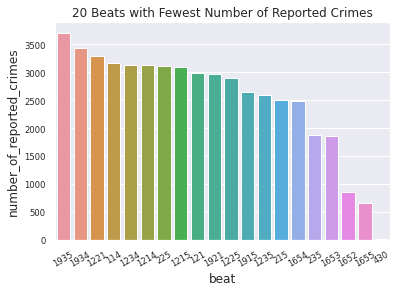

In [14]:
#graph of above table
last20_beat = df_beat.beat[-20:]
#print(last20_beat)
last20_crime = df_beat.number_of_reported_crimes[-20:]
sns.set(font_scale = 1)
ax = sns.barplot(x = last20_beat, y = last20_crime, order = last20_beat, label = 'small')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
ax.set_title('20 Beats with Fewest Number of Reported Crimes')
plt.show()

We can sort the above data by District too, as that will be easier to draw geographical conclusions from than many sparse beats...

In [15]:
#create counter for the 20 beats with highest number of crimes
top20_crime = {}
for ind in df_beat.index[:20]:
    beat = df_beat['beat'][ind]
    numCrimes = df_beat['number_of_reported_crimes'][ind]
    top20_crime[beat] = numCrimes
print(top20_crime)

{423: 31784, 421: 30970, 624: 28946, 1533: 28633, 823: 27745, 511: 27279, 1112: 26929, 1522: 26615, 2533: 26351, 414: 25649, 621: 24865, 612: 24689, 825: 24626, 321: 24305, 522: 24192, 713: 23803, 1532: 23779, 1011: 23463, 1531: 23002, 1122: 22852}


In [16]:
#sort counter by district
top20_crime_district = {}
for beat in top20_crime:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in top20_crime_district.keys():
        top20_crime_district[district] += 1
    else:
        top20_crime_district[district] = 1
#print(top20_crime_district)
top20_crime_district_sorted_keys = sorted(top20_crime_district, key=top20_crime_district.get, reverse=True)
top20_crime_district_sort ={}
for district in top20_crime_district_sorted_keys:
    top20_crime_district_sort[district] = top20_crime_district[district]
print(top20_crime_district_sort)

{15: 4, 4: 3, 6: 3, 8: 2, 5: 2, 11: 2, 25: 1, 3: 1, 7: 1, 10: 1}


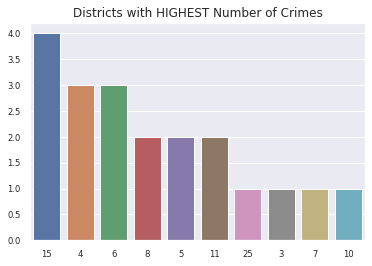

In [17]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(top20_crime_district_sort.keys()), y = list(top20_crime_district_sort.values()), order = top20_crime_district_sort, label = 'small')
ax.set_title('Districts with HIGHEST Number of Crimes')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

Now, the districts with the lowest number of crimes...

In [18]:
#create counter for the 20 beats with lowest number of crimes
low20_crime = {}
for ind in df_beat.index[-20:]:
    beat = df_beat['beat'][ind]
    numCrimes = df_beat['number_of_reported_crimes'][ind]
    low20_crime[beat] = numCrimes
print(low20_crime)

{1935: 3711, 1934: 3434, 1221: 3290, 114: 3176, 1234: 3131, 1214: 3126, 225: 3119, 1215: 3098, 121: 2980, 1921: 2979, 1225: 2899, 1915: 2642, 1235: 2586, 215: 2501, 1654: 2478, 235: 1880, 1653: 1860, 1652: 851, 1655: 652, 430: 16}


In [19]:
#sort this counter by district
low20_crime_district = {}
for beat in low20_crime:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in low20_crime_district.keys():
        low20_crime_district[district] += 1
    else:
        low20_crime_district[district] = 1
#print(low20_crime_district)
low20_crime_district_sorted_keys = sorted(low20_crime_district, key=low20_crime_district.get, reverse=True)
low20_crime_district_sort ={}
for district in low20_crime_district_sorted_keys:
    low20_crime_district_sort[district] = low20_crime_district[district]
print(low20_crime_district_sort)

{12: 6, 19: 4, 16: 4, 2: 3, 1: 2, 4: 1}


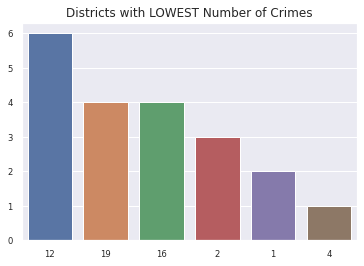

In [20]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(low20_crime_district_sort.keys()), y = list(low20_crime_district_sort.values()), order = low20_crime_district_sort, label = 'small')
ax.set_title('Districts with LOWEST Number of Crimes')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

*This graph, at first glance, might be a little misleading...This chart shows the districts with the most beats with the LOWEST number of crimes (i.e. District 12 has 6 beats that are all in the list of the 20 Beats with the LOWEST Number of Crimes). All future district graphs will function in this manner*

Now, number of arrests:

In [21]:
#table showing 20 beats with highest number of arrests
df_beat.sort_values(by = 'arrests_by_beat', ascending = False, inplace = True)
df_beat.head(20)

,beat,number_of_reported_crimes,arrests_by_beat
3,1533,28633,15282
6,1112,26929,14231
7,1522,26615,13453
16,1532,23779,12758
8,2533,26351,12648
18,1531,23002,12606
19,1122,22852,11678
17,1011,23463,11373
40,1113,19996,10828
24,1121,22025,10580


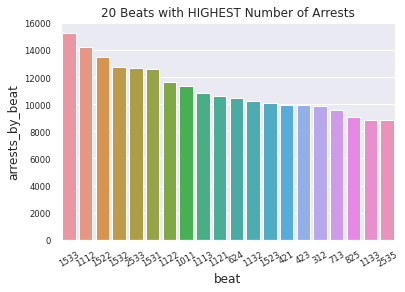

In [22]:
#graph of above table
top20_beat = df_beat.beat[:20]
top20_arrest = df_beat.arrests_by_beat[:20]
#print(top20_beat)
sns.set(font_scale = 1)
ax = sns.barplot(x = top20_beat, y = top20_arrest, order = top20_beat, label = 'small')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
ax.set_title('20 Beats with HIGHEST Number of Arrests')
plt.show()

Turning to 20 beats with lowest number of arrests...

In [23]:
#table showing 20 beats with lowest number of arrests
df_beat.tail(20)

,beat,number_of_reported_crimes,arrests_by_beat
254,1813,6854,774
296,215,2501,764
285,1221,3290,734
281,1925,4093,724
291,121,2980,683
286,114,3176,680
293,1225,2899,647
292,1921,2979,564
280,1621,4130,548
294,1915,2642,542


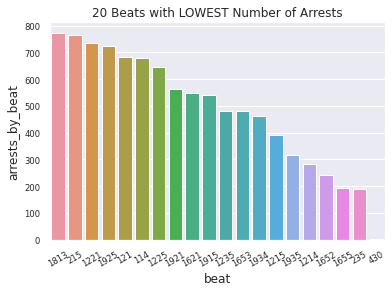

In [24]:
#graph of above table
last20_beat = df_beat.beat[-20:]
last20_arrest = df_beat.arrests_by_beat[-20:]
#print(last20_beat)
sns.set(font_scale = 1)
ax = sns.barplot(x = last20_beat, y = last20_arrest, order = last20_beat, label = 'small')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
ax.set_title('20 Beats with LOWEST Number of Arrests')
plt.show()

We will do a similar sort by districts here too...

In [25]:
#create counter for the 20 beats with highest number of arrests
top20_arrest = {}
for ind in df_beat.index[:20]:
    beat = df_beat['beat'][ind]
    numarrests = df_beat['arrests_by_beat'][ind]
    top20_arrest[beat] = numarrests
print(top20_arrest)

{1533: 15282, 1112: 14231, 1522: 13453, 1532: 12758, 2533: 12648, 1531: 12606, 1122: 11678, 1011: 11373, 1113: 10828, 1121: 10580, 624: 10451, 1132: 10254, 1523: 10113, 421: 9968, 423: 9912, 312: 9891, 713: 9549, 825: 9081, 1133: 8864, 2535: 8839}


In [26]:
#sort counter by district
top20_arrest_district = {}
for beat in top20_arrest:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in top20_arrest_district.keys():
        top20_arrest_district[district] += 1
    else:
        top20_arrest_district[district] = 1
#print(top20_arrest_district)
top20_arrest_district_sorted_keys = sorted(top20_arrest_district, key=top20_arrest_district.get, reverse=True)
top20_arrest_district_sort ={}
for district in top20_arrest_district_sorted_keys:
    top20_arrest_district_sort[district] = top20_arrest_district[district]
print(top20_arrest_district_sort)

{11: 6, 15: 5, 25: 2, 4: 2, 10: 1, 6: 1, 3: 1, 7: 1, 8: 1}


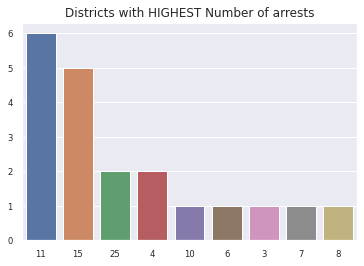

In [27]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(top20_arrest_district_sort.keys()), y = list(top20_arrest_district_sort.values()), order = top20_arrest_district_sort, label = 'small')
ax.set_title('Districts with HIGHEST Number of arrests')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

Now the Districts with the lowest number of arrests...

In [28]:
#create counter for the 20 beats with highest number of arrests
low20_arrest = {}
for ind in df_beat.index[-20:]:
    beat = df_beat['beat'][ind]
    numarrests = df_beat['arrests_by_beat'][ind]
    low20_arrest[beat] = numarrests
print(low20_arrest)

{1813: 774, 215: 764, 1221: 734, 1925: 724, 121: 683, 114: 680, 1225: 647, 1921: 564, 1621: 548, 1915: 542, 1235: 483, 1653: 480, 1934: 462, 1215: 392, 1935: 318, 1214: 285, 1652: 242, 1655: 194, 235: 189, 430: 2}


In [29]:
#sort coutner by district
low20_arrest_district = {}
for beat in low20_arrest:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in low20_arrest_district.keys():
        low20_arrest_district[district] += 1
    else:
        low20_arrest_district[district] = 1
#print(low20_arrest_district)
low20_arrest_district_sorted_keys = sorted(low20_arrest_district, key=low20_arrest_district.get, reverse=True)
low20_arrest_district_sort ={}
for district in low20_arrest_district_sorted_keys:
    low20_arrest_district_sort[district] = low20_arrest_district[district]
print(low20_arrest_district_sort)

{12: 5, 19: 5, 16: 4, 2: 2, 1: 2, 18: 1, 4: 1}


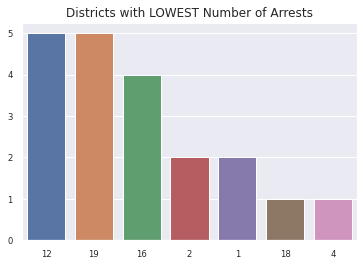

In [30]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(low20_arrest_district_sort.keys()), y = list(low20_arrest_district_sort.values()), order = low20_arrest_district_sort, label = 'small')
ax.set_title('Districts with LOWEST Number of Arrests')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

Now, let's examine the beats with highest and lowest arrest to reported crime ratio, which is equivalent to the percentage of reported crimes leading to arrests:

First, we need to make a column that holds this ratio

In [31]:
df_beat.columns

Index(['beat', 'number_of_reported_crimes', 'arrests_by_beat'], dtype='object')

In [32]:
#creating the ratio column
df_beat['arrest_to_crime_ratio'] = df_beat.apply(lambda x: x.arrests_by_beat/x.number_of_reported_crimes, axis = 1)

In [33]:
#table showing 20 beats with highest arrest:crime ratio
df_beat.sort_values(by = 'arrest_to_crime_ratio', ascending = False, inplace = True)
df_beat.head(20)

,beat,number_of_reported_crimes,arrests_by_beat,arrest_to_crime_ratio
181,134,11748,6965,0.592867
168,1114,12060,6886,0.570978
219,2113,9630,5487,0.569782
18,1531,23002,12606,0.548039
40,1113,19996,10828,0.541508
86,1115,16106,8708,0.540668
16,1532,23779,12758,0.536524
3,1533,28633,15282,0.533720
6,1112,26929,14231,0.528464
76,1134,16706,8659,0.518317


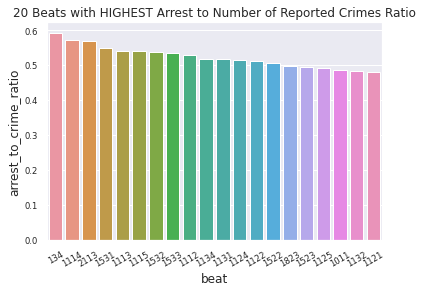

In [34]:
#graphing above data
top20_beat = df_beat.beat[:20]
top20_ratio = df_beat.arrest_to_crime_ratio[:20]
#print(top20_beat)
sns.set(font_scale = 1)
ax = sns.barplot(x = top20_beat, y = top20_ratio, order = top20_beat, label = 'small')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
ax.set_title('20 Beats with HIGHEST Arrest to Number of Reported Crimes Ratio')
plt.show()

In [35]:
#table showing 20 beats with lowest arrest:crime ratio
df_beat.tail(20)

,beat,number_of_reported_crimes,arrests_by_beat,arrest_to_crime_ratio
245,1911,7863,1211,0.154012
236,1631,8424,1283,0.152303
265,1613,5875,893,0.152000
157,2411,12714,1908,0.150071
80,1424,16569,2385,0.143944
259,1611,6488,908,0.139951
251,1614,7420,1018,0.137197
284,1934,3434,462,0.134537
160,1933,12673,1687,0.133118
280,1621,4130,548,0.132688


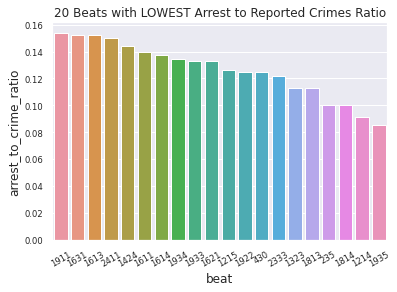

In [36]:
#graphing above table
low20_beat = df_beat.beat[-20:]
low20_ratio = df_beat.arrest_to_crime_ratio[-20:]
#print(low20_beat)
sns.set(font_scale = 1)
ax = sns.barplot(x = low20_beat, y = low20_ratio, order = low20_beat, label = 'small')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
ax.set_title('20 Beats with LOWEST Arrest to Reported Crimes Ratio')
plt.show()

Again, we'll look at the above data now sorted by district...

In [37]:
#create counter for the 20 beats with highest number of ratios
top20_ratio = {}
for ind in df_beat.index[:20]:
    beat = df_beat['beat'][ind]
    numratios = df_beat['arrest_to_crime_ratio'][ind]
    top20_ratio[beat] = numratios
print(top20_ratio)

{134: 0.5928668709567586, 1114: 0.5709784411276949, 2113: 0.5697819314641744, 1531: 0.5480393009303539, 1113: 0.541508301660332, 1115: 0.5406680740096859, 1532: 0.5365238235417805, 1533: 0.5337198337582509, 1112: 0.5284637379776449, 1134: 0.5183167724170956, 1131: 0.5161034084344309, 1124: 0.514538725878932, 1122: 0.5110274811832662, 1522: 0.5054668420063874, 1823: 0.4975013454293842, 1523: 0.4946925598004207, 1125: 0.4904423050090693, 1011: 0.4847206239611303, 1132: 0.4828365588359938, 1121: 0.4803632236095346}


In [38]:
top20_ratio_district = {}
for beat in top20_ratio:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in top20_ratio_district.keys():
        top20_ratio_district[district] += 1
    else:
        top20_ratio_district[district] = 1
#print(top20_ratio_district)
top20_ratio_district_sorted_keys = sorted(top20_ratio_district, key=top20_ratio_district.get, reverse=True)
top20_ratio_district_sort ={}
for district in top20_ratio_district_sorted_keys:
    top20_ratio_district_sort[district] = top20_ratio_district[district]
print(top20_ratio_district_sort)

{11: 11, 15: 5, 1: 1, 21: 1, 18: 1, 10: 1}


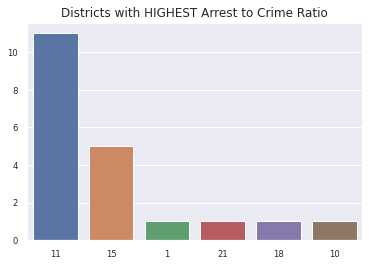

In [39]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(top20_ratio_district_sort.keys()), y = list(top20_ratio_district_sort.values()), order = top20_ratio_district_sort, label = 'small')
ax.set_title('Districts with HIGHEST Arrest to Crime Ratio')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

The districts with the lowest arrest to crime ratio...

In [40]:
#create counter for the 20 beats with lowest arrest to crime ratio
low20_ratio = {}
for ind in df_beat.index[-20:]:
    beat = df_beat['beat'][ind]
    numratio = df_beat['arrest_to_crime_ratio'][ind]
    low20_ratio[beat] = numratio
print(low20_ratio)

{1911: 0.15401246343634745, 1631: 0.15230294396961064, 1613: 0.152, 2411: 0.1500707881075979, 1424: 0.14394350896252037, 1611: 0.1399506781750925, 1614: 0.13719676549865228, 1934: 0.13453698311007573, 1933: 0.13311765170046555, 1621: 0.13268765133171914, 1215: 0.1265332472562944, 1922: 0.125, 430: 0.125, 2333: 0.12144986662482347, 1323: 0.11302761423003566, 1813: 0.11292675809746133, 235: 0.10053191489361703, 1814: 0.10029039618336445, 1214: 0.09117082533589252, 1935: 0.0856911883589329}


In [41]:
#sort coutner by district
low20_ratio_district = {}
for beat in low20_ratio:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in low20_ratio_district.keys():
        low20_ratio_district[district] += 1
    else:
        low20_ratio_district[district] = 1
#print(low20_ratio_district)
low20_ratio_district_sorted_keys = sorted(low20_ratio_district, key=low20_ratio_district.get, reverse=True)
low20_ratio_district_sort ={}
for district in low20_ratio_district_sorted_keys:
    low20_ratio_district_sort[district] = low20_ratio_district[district]
print(low20_ratio_district_sort)

{19: 5, 16: 5, 12: 2, 18: 2, 24: 1, 14: 1, 4: 1, 23: 1, 13: 1, 2: 1}


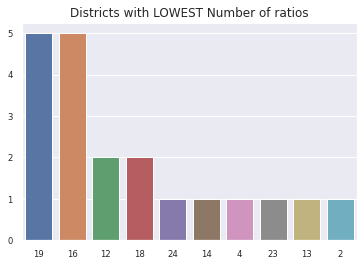

In [42]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(low20_ratio_district_sort.keys()), y = list(low20_ratio_district_sort.values()), order = low20_ratio_district_sort, label = 'small')
ax.set_title('Districts with LOWEST Number of ratios')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

Let's look at all our District data side by side and see if we can notice some patterns...

In [43]:
print('TOP 20 BEATS IN CRIME, ARREST, AND RATIO\n')
print('CRIME: ')
print(top20_crime_district_sort)
print('-'*60)
print('ARREST: ')
print(top20_arrest_district_sort)
print('-'*60)
print('RATIO: ')
print(top20_ratio_district_sort)
print('-'*60)

TOP 20 BEATS IN CRIME, ARREST, AND RATIO

CRIME: 
{15: 4, 4: 3, 6: 3, 8: 2, 5: 2, 11: 2, 25: 1, 3: 1, 7: 1, 10: 1}
------------------------------------------------------------
ARREST: 
{11: 6, 15: 5, 25: 2, 4: 2, 10: 1, 6: 1, 3: 1, 7: 1, 8: 1}
------------------------------------------------------------
RATIO: 
{11: 11, 15: 5, 1: 1, 21: 1, 18: 1, 10: 1}
------------------------------------------------------------


In [44]:
print('BOTTOM 20 BEATS IN CRIME, ARREST, AND RATIO\n')
print('CRIME: ')
print(low20_crime_district_sort)
print('-'*60)
print('ARREST: ')
print(low20_arrest_district_sort)
print('-'*60)
print('RATIO: ')
print(low20_ratio_district_sort)
print('-'*60)

BOTTOM 20 BEATS IN CRIME, ARREST, AND RATIO

CRIME: 
{12: 6, 19: 4, 16: 4, 2: 3, 1: 2, 4: 1}
------------------------------------------------------------
ARREST: 
{12: 5, 19: 5, 16: 4, 2: 2, 1: 2, 18: 1, 4: 1}
------------------------------------------------------------
RATIO: 
{19: 5, 16: 5, 12: 2, 18: 2, 24: 1, 14: 1, 4: 1, 23: 1, 13: 1, 2: 1}
------------------------------------------------------------


**Key Observations:**

* Beats in Police Districts 4 and 6 typically had the highest number of reported crimes, District 4 also had some high number of arrests
* Beats in Police Districts 2, 12, 16, and 19 posted some of the lowest results across all categories
* Beats in Districts 7, 8, and 25 also had prevelant results at the upper ends of the crime and arrest categories
* Beats in Districts 10, 11, and 15 were consistently high in all three categories
* Beats 1112, 1522, was in the top 20 in all 3 categories, 713 in crimes and arrests
* Beats that neighbor each other (beat #'s are within a small amount [~5] of each other) often have similar stats, unsurprisingly

**Next Steps...**
* Examine the demographic data in these beats...we will make the preliminary assumption that those consistently at the top of all 3 categories (and even the number of arrests and reported crimes categories) will have predominantly black populations
* Determine if beats with high frequencies of escalated police force matches the beats at the top of these categories

# SUBJECT ID:

In [45]:
df_subject_id.head()

,subject_ID,list_of_trr_id,gender,race,age
0,1.0,"4,5,",MALE,HISPANIC,38.0
1,2.0,"7,8,",MALE,BLACK,25.0
2,3.0,"9,",MALE,BLACK,24.0
3,4.0,"10,",MALE,BLACK,21.0
4,5.0,"11,12,",MALE,BLACK,21.0


First, let's see the race breakdown of the subjects:

In [46]:
df_subject_id.race.value_counts()

BLACK                             32900
HISPANIC                           6410
WHITE                              4537
ASIAN/PACIFIC ISLANDER              343
NATIVE AMERICAN/ALASKAN NATIVE       41
Name: race, dtype: int64

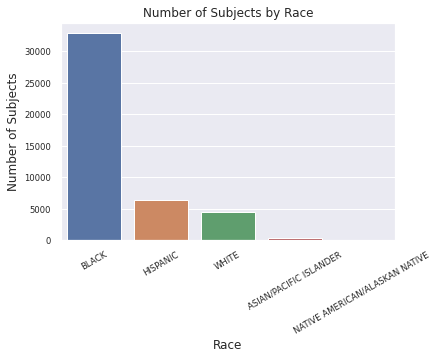

In [47]:
#graphing this subject breakdown by race
ax = sns.barplot(x = df_subject_id.race.value_counts().index, y = df_subject_id.race.value_counts(), label = 'small')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Race')
ax.set_ylabel('Number of Subjects')
ax.tick_params(labelsize=8.5)
ax.set_title('Number of Subjects by Race')
plt.show()

Perhaps it would be useful to also see the number of trr incidents by subject id and race:

First, a column with the number of trr incidents attributed to each subject id should be made.

In [48]:
#making the aforementioned column
df_subject_id['number_of_trr'] = df_subject_id.list_of_trr_id.apply(lambda x: len(x.split(','))-1)
df_subject_id.head()

,subject_ID,list_of_trr_id,gender,race,age,number_of_trr
0,1.0,"4,5,",MALE,HISPANIC,38.0,2
1,2.0,"7,8,",MALE,BLACK,25.0,2
2,3.0,"9,",MALE,BLACK,24.0,1
3,4.0,"10,",MALE,BLACK,21.0,1
4,5.0,"11,12,",MALE,BLACK,21.0,2


In [49]:
#we have a null value for race for some reason
#assuming this means the subjects race was either undisclosed or not one of the 5 main races, we just call it 'OTHER'
df_subject_id.race.replace(np.nan, 'OTHER', inplace = True)
df_subject_id.race.unique()

array(['HISPANIC', 'BLACK', 'ASIAN/PACIFIC ISLANDER', 'WHITE', 'OTHER',
       'NATIVE AMERICAN/ALASKAN NATIVE'], dtype=object)

In [50]:
#counting and storing the number of trr incidents by race
trr_by_race_dict ={}
for ind in df_subject_id.index:
    race = df_subject_id['race'][ind]
    num_trr = df_subject_id['number_of_trr'][ind]
    if race in trr_by_race_dict.keys():
        trr_by_race_dict[race] += num_trr
    else:
        trr_by_race_dict[race] = num_trr
out = dict(itertools.islice(trr_by_race_dict.items(), N)) 
print(out)

{'HISPANIC': 9376, 'BLACK': 49733, 'ASIAN/PACIFIC ISLANDER': 430, 'WHITE': 6535, 'OTHER': 891, 'NATIVE AMERICAN/ALASKAN NATIVE': 54}


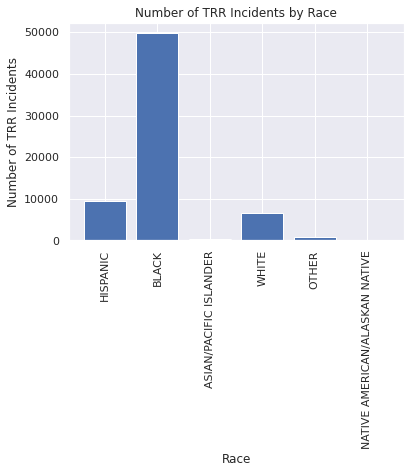

In [51]:
#graphing our data
plt.bar(x = trr_by_race_dict.keys(), height =trr_by_race_dict.values())
plt.title('Number of TRR Incidents by Race')
plt.xlabel('Race')
plt.ylabel("Number of TRR Incidents")
plt.xticks(rotation=90)
plt.show()

Now, let's see the number of subjects by Age:

There are too many ages to enumerate each on a plot, so we'll make age bands grouped by 10's

In [52]:
#estbalish our age bands and count the number of suspects in each age band
age_band_dict = {}
age_band_dict['<20'] = 0
age_band_dict['20-29'] = 0
age_band_dict['30-39'] = 0
age_band_dict['40-49'] = 0
age_band_dict['50-59'] = 0
age_band_dict['60-69'] = 0
age_band_dict['>=70'] = 0
for ind in df_subject_id.index:
    age = df_subject_id['age'][ind]
    if (age<20):
        age_band_dict['<20'] += 1
    elif(age>=20 and age<30):
        age_band_dict['20-29'] += 1
    elif(age>=30 and age<40):
        age_band_dict['30-39'] += 1
    elif(age>=40 and age<50):
        age_band_dict['40-49'] += 1
    elif(age>=50 and age<60):
        age_band_dict['50-59'] += 1
    elif(age>=60 and age<70):
        age_band_dict['60-69'] += 1
    else:
        age_band_dict['>=70'] += 1
out = dict(itertools.islice(age_band_dict.items(), N)) 
print(out)

{'<20': 4940, '20-29': 21714, '30-39': 10150, '40-49': 5369, '50-59': 2033, '60-69': 324, '>=70': 291}


In [53]:
#helper function to apply the age banding
def bander(age):
    if (age<20):
        return '<20'
    elif(age>=20 and age<30):
        return '20-29'
    elif(age>=30 and age<40):
        return '30-39'
    elif(age>=40 and age<50):
        return '40-49'
    elif(age>=50 and age<60):
        return '50-59'
    elif(age>=60 and age<70):
        return '60-69'
    else:
        return '>=70'

In [54]:
#creating a new column in our data table for the age banding and applying it to each subject
df_subject_id['age_bands'] = df_subject_id.age.apply(lambda x: bander(x))

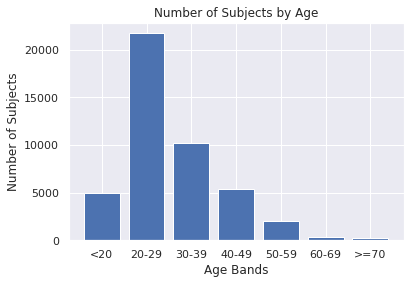

In [55]:
#graphing the frequencies of the age bands
plt.bar(x = age_band_dict.keys(), height =age_band_dict.values())
plt.title('Number of Subjects by Age')
plt.xlabel('Age Bands')
plt.ylabel("Number of Subjects")
plt.show()

We can look at Gender too:

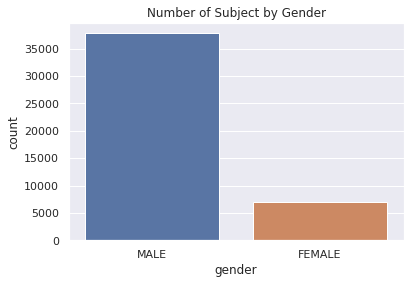

In [56]:
#graphing the subjects by frequency of gender
ax = sns.countplot(x="gender", data=df_subject_id)
ax.set_title('Number of Subject by Gender')
plt.show()

Let's see the combined relationship of gender and race to trr incidents:

In [57]:
#first, males
df_subject_id_males = df_subject_id.loc[df_subject_id.gender == 'MALE']

In [58]:
#sorting the males by race
trr_by_race_dict_male ={}
for ind in df_subject_id_males.index:
    race = df_subject_id_males['race'][ind]
    num_trr = df_subject_id_males['number_of_trr'][ind]
    if race in trr_by_race_dict_male.keys():
        trr_by_race_dict_male[race] += num_trr
    else:
        trr_by_race_dict_male[race] = num_trr
dict1 = OrderedDict(sorted(trr_by_race_dict_male.items())) 
out = dict(itertools.islice(dict1.items(), N)) 
print(out)

{'ASIAN/PACIFIC ISLANDER': 351, 'BLACK': 42227, 'HISPANIC': 8316, 'NATIVE AMERICAN/ALASKAN NATIVE': 42, 'OTHER': 749, 'WHITE': 5441}


In [59]:
#now the ladies
df_subject_id_females = df_subject_id.loc[df_subject_id.gender == 'FEMALE']

In [60]:
#sorting females by race
trr_by_race_dict_female ={}
for ind in df_subject_id_females.index:
    race = df_subject_id_females['race'][ind]
    num_trr = df_subject_id_females['number_of_trr'][ind]
    if race in trr_by_race_dict_female.keys():
        trr_by_race_dict_female[race] += num_trr
    else:
        trr_by_race_dict_female[race] = num_trr
dict2 = OrderedDict(sorted(trr_by_race_dict_female.items())) 
out = dict(itertools.islice(dict2.items(), N)) 
print(out)

{'ASIAN/PACIFIC ISLANDER': 77, 'BLACK': 7471, 'HISPANIC': 1058, 'NATIVE AMERICAN/ALASKAN NATIVE': 12, 'OTHER': 141, 'WHITE': 1086}


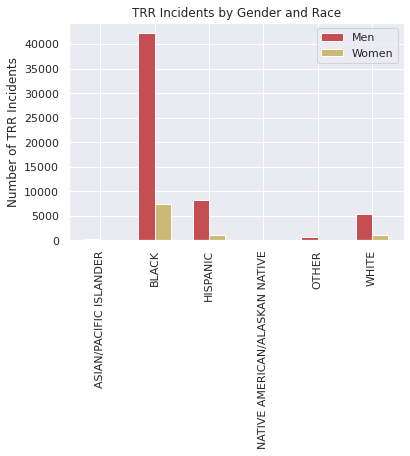

In [61]:
#combining the two on a bar chart
n = 6
index = np.arange(n)
width = .3
fig, ax = plt.subplots()
y1 = list(dict1.values())
y2 = list(dict2.values())
rects1 = ax.bar(index, y1, width, color='r')
rects2 = ax.bar(index + width, y2, width, color='y')
ax.set_ylabel('Number of TRR Incidents')
ax.set_title('TRR Incidents by Gender and Race')
ax.set_xticks(index + width / 2)
#ax.xticks(rotation=90)
ax.set_xticklabels(('ASIAN/PACIFIC ISLANDER', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN/ALASKAN NATIVE', 'OTHER', 'WHITE'), rotation = 90)
ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))
plt.show()

In [62]:
df_subject_id.columns = ['subject_ID', 'list_of_trr_id', 'gender', 'race', 'age','number_of_trr', 'age_bands']

In [63]:
#a really useful table to sum up our findings in this dataset
pd.set_option('display.max_rows', None)
table = pd.pivot_table(df_subject_id, values='number_of_trr', index=['race', 'gender', 'age_bands'], aggfunc=np.sum)
table

number_of_trr
race                           gender age_bands               
ASIAN/PACIFIC ISLANDER         FEMALE 20-29                 24
                                      30-39                 21
                                      40-49                 15
                                      50-59                  2
                                      60-69                  2
                                      <20                    9
                                      >=70                   4
                               MALE   20-29                171
                                      30-39                 71
                                      40-49                 52
                                      50-59                 14
                                      60-69                 10
                                      <20                   26
                                      >=70                   7
BLACK                          FEMALE 20-29               3592
                                      30-39               1663
                                      40-49                895
                                      50-59                292
                                      60-69                 39
                                      <20                  944
                                      >=70                  46
                               MALE   20-29              20700
                                      30-39               9723
                                      40-49               4972
                                      50-59               1853
                                      60-69                212
                                      <20                 4576
                                      >=70                 191
HISPANIC                       FEMALE 20-29                538
                                      30-39                237
                                      40-49                112
                                      50-59                 30
                                      60-69                  5
                                      <20                  132
                                      >=70                   4
                               MALE   20-29               4292
                                      30-39               2115
                                      40-49                767
                                      50-59                216
                                      60-69                 52
                                      <20                  832
                                      >=70                  42
NATIVE AMERICAN/ALASKAN NATIVE FEMALE 20-29                  6
                                      30-39                  5
                                      40-49                  1
                               MALE   20-29                  8
                                      30-39                  8
                                      40-49                 20
                                      50-59                  1
                                      60-69                  1
                                      <20                    4
OTHER                          FEMALE 20-29                 77
                                      30-39                 22
                                      40-49                 17
                                      50-59                  4
                                      <20                   20
                                      >=70                   1
                               MALE   20-29                378
                                      30-39                158
                                      40-49                 90
                                      50-59                 36
                                      60-69                  7
                 

Key Takeaways:
* Already, we see the vast majority of subjects are Black, young (<40), males
* Native Americans and Asians are rarely invovled in such incidents, possibly due to the fact that they are the true minority demographics living in the Chicago-Metro Area
* The majority of subjects involved in such incidents were in their 20's, though many teens and subjects in their 30's were also involved. Those over 40 were invovled in considerably fewer incidents
* Males across all age groups and races were invovled in nearly 7 times more incidents than females
* Black Females were involved in close to the same number TRR incidents as Hispanic males
* White Males were in a considerable amount of incidents, though paling in comparison to Black Males, yet comparable to Black Females
* White Females and Hispanic Females were involved in nearly the same amount of incidents

**Next Steps...**
* Determine how these numbers stack up propotionally to the demographic makeup of Chicago and even the police beats (though at a later step for beat info)
* Possibly enumerate the correlation of race, age, and gender to likelihood of being invovled in a TRR incident


# TRR BY BEAT:

In [64]:
df_trr_by_beat.head()

,beat,number_of_trr_reports,list_of_trr_ids
0,111,141,"786,3722,3723,3724,3725,3727,8771,8772,8773,97..."
1,112,67,"279,280,2947,10483,12117,12214,18725,18726,203..."
2,113,136,"737,1028,1029,8204,8205,13050,13740,16963,1698..."
3,114,78,"68897,70202,71493,71566,71896,72098,72101,7211..."
4,121,13,"70909,76212,76706,80616,82312,86627,86629,9197..."


Not much is happening here...it would be helpful to make a bar chart of the beats with the most/least number of trr reports:

In [65]:
#show table sorted by 20 beats with highest number of trr reports
df_trr_by_beat.sort_values(by = 'number_of_trr_reports', ascending = False, inplace = True)
df_trr_by_beat.head(20)

,beat,number_of_trr_reports,list_of_trr_ids
142,1134,881,"10,11,12,28,29,30,31,38,484,513,589,590,591,70..."
64,621,854,"463,1084,1085,1086,1087,1098,1099,1113,1120,11..."
130,1112,816,"9,33,34,35,36,53,54,159,160,161,162,168,169,17..."
74,713,718,"730,802,806,1025,1246,1463,1464,1670,1691,1744..."
183,1522,679,"198,270,456,457,528,530,1182,1348,1349,1351,20..."
135,1122,666,"14,56,63,68,154,155,368,487,488,489,490,1075,1..."
188,1533,663,"388,389,1628,2102,3030,3379,3885,3886,4351,468..."
67,624,623,"823,1219,2251,2252,2279,2308,2313,2546,2547,25..."
57,531,618,"740,742,788,789,835,836,837,1298,1398,1399,140..."
222,1824,599,"395,469,470,551,928,1497,1796,1797,2190,2202,2..."


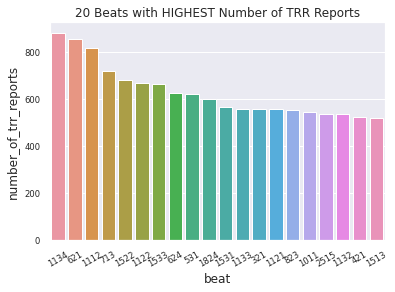

In [66]:
#graph above table
top20_beat = df_trr_by_beat.beat[:20]
#print(top20_beat)
top20_trr = df_trr_by_beat.number_of_trr_reports[:20]
sns.set(font_scale = 1)
ax = sns.barplot(x = top20_beat, y = top20_trr, order = top20_beat, label = 'small')
ax.set_title('20 Beats with HIGHEST Number of TRR Reports')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
plt.show()

In [67]:
#show table with 20 beats with lowest number of trr reports
df_trr_by_beat.tail(20)

,beat,number_of_trr_reports,list_of_trr_ids
232,1921,43,"69118,69123,71280,71282,71283,74246,74249,7425..."
231,1915,40,"69459,69460,71147,71292,71293,71295,72829,7298..."
241,1935,38,"68979,71926,71927,73318,73320,75221,75222,7559..."
153,1225,31,"77027,78110,78111,78429,79762,79958,80363,8057..."
240,1934,31,"68883,69229,69232,69969,72074,72075,72076,7207..."
148,1215,28,"75060,75108,75109,75110,75111,78770,79628,7964..."
203,1653,28,"51965,57159,57161,60273,60276,65645,65646,7288..."
16,215,25,"70683,73684,74547,74863,74865,77834,78408,7840..."
257,2131,24,"1902,1903,1904,1951,2117,3004,7260,11784,15132..."
149,1221,24,"76648,76649,77705,77815,77816,77984,77985,7903..."


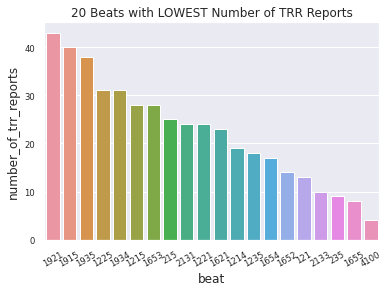

In [68]:
#graph above table
low20_beat = df_trr_by_beat.beat[-20:]
#print(top20_beat)
low20_trr = df_trr_by_beat.number_of_trr_reports[-20:]
sns.set(font_scale = 1)
ax = sns.barplot(x = low20_beat, y = low20_trr, order = low20_beat, label = 'small')
ax.set_title('20 Beats with LOWEST Number of TRR Reports')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
plt.show()

We will sort the two above graphs by district as well....

In [69]:
#create counter of districts from top 20 beats and sort
top20_district = {}
for beat in top20_beat:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in top20_district.keys():
        top20_district[district] += 1
    else:
        top20_district[district] = 1
#print(top20_district)
top20_district_sorted_keys = sorted(top20_district, key=top20_district.get, reverse=True)
top20_district_sort ={}
for district in top20_district_sorted_keys:
    top20_district_sort[district] = top20_district[district]

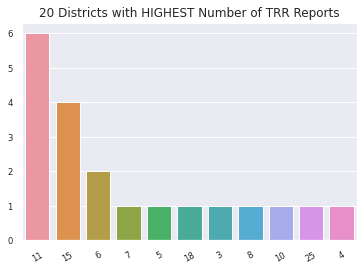

In [70]:
#graph above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(top20_district_sort.keys()), y = list(top20_district_sort.values()), order = top20_district_sort, label = 'small')
ax.set_title('20 Districts with HIGHEST Number of TRR Reports')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
plt.show()

In [71]:
#create counter of districts from low 20 beats and sort
low20_district = {}
for beat in low20_beat:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in low20_district.keys():
        low20_district[district] += 1
    else:
        low20_district[district] = 1
#print(low20_district)
low20_district_sorted_keys = sorted(low20_district, key=low20_district.get, reverse=True)
low20_district_sort ={}
for district in low20_district_sorted_keys:
    low20_district_sort[district] = low20_district[district]

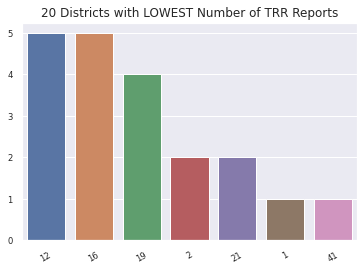

In [72]:
#graph above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(low20_district_sort.keys()), y = list(low20_district_sort.values()), order = low20_district_sort, label = 'small')
ax.set_title('20 Districts with LOWEST Number of TRR Reports')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
plt.show()

Key Takeaways: 
* Again, we see the prominence of District 11 and even 15 in having the highest number of TRR reports. These beats were particularly high in arrests ... a possible link between the two

* District 6, which was high in reported crimes, was slightly more prevalent in the number of TRR reports, but District 4, which was also high in reported crimes, wasn’t very present here in TRR reports

* A much wider variance of districts here compared to number of crimes, arrests comparisons made earlier

* Districts 19, 12, and 16 were prevalent all across the fewest amount of TRR reports, matching the trend we saw of these same districts having the lowest number of arrests and reported crimes

**Next Steps...**
* It is very much worthwhile to see the demographic makeups/location of the districts we noted for some baseline data
* Within each beat, we should track a ratio of trr_reports:arrests and trr_reports:crimes
* We should also have an aggregate average of amount of trr_reports to arrests and crimes to determine how often trr_reports are filed in these instances

# TRR ID

In [73]:
df_trr_id.head()

,trr_id,sr_no,se_no,beat,party_fired_first,taser,firearm_used,trr_year,weapon_discharge_yn,list_of_subcats,...,subject_battery_threat,subject_had_weapon,subject_attack_with_weapon,subject_deadly_force,subject_other,subject_armed,injured,alleged_injury,subject_no,event_id
0,4,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
1,5,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
2,7,2.0,2.0,1131,NaN,0,0,2004,1,"4.1,4.2,",...,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,2
3,8,2.0,2.0,1131,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,2
4,9,3.0,3.0,1112,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,0,3.0,3


In [74]:
df_trr_id.columns

Index(['trr_id', 'sr_no', 'se_no', 'beat', 'party_fired_first', 'taser',
       'firearm_used', 'trr_year', 'weapon_discharge_yn', 'list_of_subcats',
       'list_of_cats', 'number_of_member_actions', 'number_of_subject_actions',
       'highest_resistance_level', 'list_of_subject_actions',
       'subject_pulled_away', 'subject_disobey_verbal', 'subject_stiffened',
       'subject_fled', 'subject_attack_no_weapon', 'subject_battery_threat',
       'subject_had_weapon', 'subject_attack_with_weapon',
       'subject_deadly_force', 'subject_other', 'subject_armed', 'injured',
       'alleged_injury', 'subject_no', 'event_id'],
      dtype='object')

In [75]:
len(df_trr_id.event_id.unique())

39942

In total, we are looking at 39942 different TRR events...

Let's see the distribution of resistance levels across these events...

For reference: 

Passive Resister = 0

Active Resister = 1

Assailant Assault = 2

Assailant Assault/Battery = 3

Assailant Battery = 4

Assailant Deadly Force = 5

*Note: Assailant Assault/Battery and Assailalnt Battery are of relatively similar "ranking". Do not assume Assailant Battery is significantly worse than Assailant Assault/Battery as the two are realtively comparable*


In [76]:
#create a coutner for each resistance level
HRL = df_trr_id.highest_resistance_level.value_counts()
HRL.sort_index(inplace = True)
print(HRL)

0.0      726
1.0    30381
2.0     9454
3.0     4264
4.0    19634
5.0     2552
Name: highest_resistance_level, dtype: int64


In [77]:
#map for each resistance level to its label
rl_dict = {}
rl_dict[0.0] = 'Passive Resister'
rl_dict[1.0] = 'Active Resister'
rl_dict[2.0] = 'Assailant Assault'
rl_dict[3.0] = 'Assailant Assault/Battery'
rl_dict[4.0] = 'Assailant Battery'
rl_dict[5.0] = 'Assailant Deadly Force'

In [78]:
#re-label the counter we create two blocks ago
HRL.rename(index = {0.0: 'Passive Resister', 1.0: 'Active Resister', 2.0 : 'Assailant Assault', 3.0: 'Assailant Assault/Battery', 4.0: 'Assailant Battery', 5.0: 'Assailant Deadly Force'}, inplace = True)

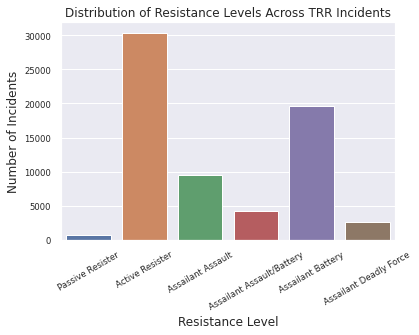

In [79]:
#graph the counter of resistance levels
sns.set(font_scale = 1)
ax = sns.barplot(x = HRL.index, y = HRL, order =HRL.index, label = 'small')
ax.set_title('Distribution of Resistance Levels Across TRR Incidents')
ax.set(xlabel='Resistance Level', ylabel='Number of Incidents')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.tick_params(labelsize=8.5)
plt.show()

We see the most common level of resistance across all incidents is an Active Resister, but the second highest is Assailant Battery, which means the subject acted in a way that harmed or offesnively contacted the police officer without his/her consent

We will do the same thing with action categories to determine how police officers most commonly responded across all situtaions...

In [80]:
#isolate the trr's where the officer logged his action
df_trr_id_cat_iso = df_trr_id.loc[df_trr_id.list_of_cats.notnull()]

Since each gives a list of action categories, we will have to go into each list and count the frequencies of each category...

In [81]:
#create a counter for the frequencies of each action category
cat_counter = {}
for i in range (2,7):
    cat_counter[i] = 0
for ind in df_trr_id_cat_iso.index:
    cat_list_str = df_trr_id_cat_iso['list_of_cats'][ind]
    cat_list = cat_list_str.split(",")
    cat_list = cat_list[:-1].copy()
    #print(cat_list)
    #cat_list.pop()
    for cat in cat_list:
        intCat = int(float(cat))
        cat_counter[intCat] += 1

In [82]:
#label each action category on the counter we just made
cat_labels = {}
cat_labels[2] = 'Other Force'
cat_labels[3] = 'Physical Force - Holding, Taser Display'
cat_labels[4] = 'Physical Force - Stunning, Chemical'
cat_labels[5] = 'Impact Weapon, Taser, Physical Force - Direct Mechanical'
cat_labels[6] = 'Firearm'
cat_counter_labeled = {}
for i in range(2,7):
    amt = cat_counter[i]
    cat_counter_labeled[cat_labels[i]] = amt

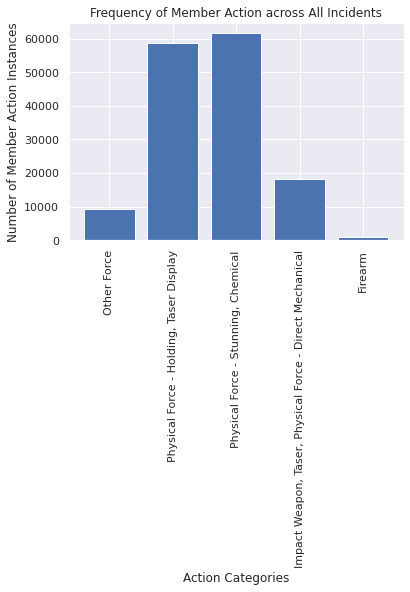

In [83]:
#graph the counter!
plt.bar(x = cat_counter_labeled.keys(), height =cat_counter_labeled.values())
plt.title('Frequency of Member Action across All Incidents')
plt.xlabel('Action Categories')
plt.xticks(rotation=90)
plt.ylabel("Number of Member Action Instances")
plt.show()

We see police mostly took actions corresponding to categories 3 and 4...below is the actioan category dictionary for reference:

2.0: 'Other Force

3.0: Physical Force - Holding, Taser Display

4.0: Physical Force - Stunning, Chemical

5.0: Impact Weapon, Taser, Physical Force - Direct Mechanical

6.0: Firearm 

We'll do a similar process with subject actions...

In [84]:
#counter for each subject action (sorry it's so sloppy!)
subject_acts_dict = {}
subject_acts_dict['subject_pulled_away'] = 0
subject_acts_dict['subject_disobey_verbal'] = 0
subject_acts_dict['subject_stiffened'] = 0
subject_acts_dict['subject_fled'] = 0
subject_acts_dict['subject_attack_no_weapon'] = 0
subject_acts_dict['subject_battery_threat'] = 0
subject_acts_dict['subject_had_weapon'] = 0
subject_acts_dict['subject_attack_with_weapon'] = 0
subject_acts_dict['subject_deadly_force'] = 0
subject_acts_dict['subject_other'] = 0
subject_acts_dict['subject_armed'] = 0
for ind in df_trr_id.index:
    if df_trr_id['subject_pulled_away'][ind] == 1:
        subject_acts_dict['subject_pulled_away'] += 1
    if df_trr_id['subject_disobey_verbal'][ind] == 1:
        subject_acts_dict['subject_disobey_verbal'] += 1
    if df_trr_id['subject_stiffened'][ind] == 1:
        subject_acts_dict['subject_stiffened'] += 1
    if df_trr_id['subject_fled'][ind] == 1:
        subject_acts_dict['subject_fled'] += 1
    if df_trr_id['subject_battery_threat'][ind] == 1:
        subject_acts_dict['subject_battery_threat'] += 1
    if df_trr_id['subject_had_weapon'][ind] == 1:
        subject_acts_dict['subject_had_weapon'] += 1
    if df_trr_id['subject_attack_with_weapon'][ind] == 1:
        subject_acts_dict['subject_attack_with_weapon'] += 1
    if df_trr_id['subject_deadly_force'][ind] == 1:
        subject_acts_dict['subject_deadly_force'] += 1
    if df_trr_id['subject_other'][ind] == 1:
        subject_acts_dict['subject_other'] += 1
    if df_trr_id['subject_armed'][ind] == 1:
        subject_acts_dict['subject_armed'] += 1
out = dict(itertools.islice(subject_acts_dict.items(), N)) 
print(out)

{'subject_pulled_away': 52458, 'subject_disobey_verbal': 61833, 'subject_stiffened': 35248, 'subject_fled': 21440, 'subject_attack_no_weapon': 0, 'subject_battery_threat': 24033, 'subject_had_weapon': 1243, 'subject_attack_with_weapon': 1716, 'subject_deadly_force': 1605, 'subject_other': 28547}


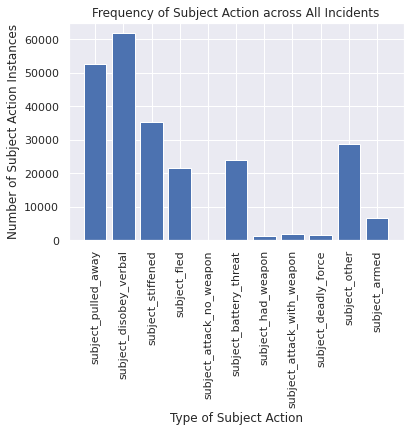

In [85]:
#graph this counter
plt.bar(x = subject_acts_dict.keys(), height =subject_acts_dict.values())
plt.title('Frequency of Subject Action across All Incidents')
plt.xlabel('Type of Subject Action')
plt.xticks(rotation= 90)
plt.ylabel("Number of Subject Action Instances")
plt.show()

Now, let's sort the trr events by event id and see what we can glean...

In [86]:
df_trr_id.head()

,trr_id,sr_no,se_no,beat,party_fired_first,taser,firearm_used,trr_year,weapon_discharge_yn,list_of_subcats,...,subject_battery_threat,subject_had_weapon,subject_attack_with_weapon,subject_deadly_force,subject_other,subject_armed,injured,alleged_injury,subject_no,event_id
0,4,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
1,5,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
2,7,2.0,2.0,1131,NaN,0,0,2004,1,"4.1,4.2,",...,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,2
3,8,2.0,2.0,1131,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,2
4,9,3.0,3.0,1112,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,0,3.0,3


In [87]:
df_subject_id.head()

,subject_ID,list_of_trr_id,gender,race,age,number_of_trr,age_bands
0,1.0,"4,5,",MALE,HISPANIC,38.0,2,30-39
1,2.0,"7,8,",MALE,BLACK,25.0,2,20-29
2,3.0,"9,",MALE,BLACK,24.0,1,20-29
3,4.0,"10,",MALE,BLACK,21.0,1,20-29
4,5.0,"11,12,",MALE,BLACK,21.0,2,20-29


In [88]:
#put the TRR incident ID's for each event ID in an accesible format
trr_by_event_dict = {}
for ind in df_trr_id.index:
    eventID = df_trr_id['event_id'][ind]
    trrID = str(df_trr_id['trr_id'][ind])
    if(eventID in trr_by_event_dict.keys()):
        trr_by_event_dict[eventID] += (trrID+',')
    else:
        trr_by_event_dict[eventID] = (trrID+',')
for key in trr_by_event_dict.keys():
    lizt = trr_by_event_dict[key].split(',')
    trr_by_event_dict[key] = lizt[:-1].copy()
out = dict(itertools.islice(trr_by_event_dict.items(), N)) 
print(out)

{1: ['4', '5'], 2: ['7', '8'], 3: ['9'], 4: ['10'], 5: ['11', '12'], 6: ['13'], 7: ['14'], 8: ['16'], 9: ['17'], 10: ['19', '20']}


In [89]:
#put the races of each subject in a more accessible format
race_by_id = {}
for ind in df_subject_id.index:
    subjectID = df_subject_id['subject_ID'][ind]
    race = df_subject_id['race'][ind]
    race_by_id[subjectID] = race
out = dict(itertools.islice(race_by_id.items(), N)) 
print(out)

{1.0: 'HISPANIC', 2.0: 'BLACK', 3.0: 'BLACK', 4.0: 'BLACK', 5.0: 'BLACK', 6.0: 'BLACK', 7.0: 'ASIAN/PACIFIC ISLANDER', 8.0: 'BLACK', 9.0: 'HISPANIC', 10.0: 'BLACK'}


In [90]:
#get subject ID of each subject in each TRR incident
subject_by_trr = {}
for ind in df_subject_id.index:
    subjectID = df_subject_id['subject_ID'][ind]
    trr_list = df_subject_id['list_of_trr_id'][ind].split(',')[:-1]
    for trr in trr_list:
        subject_by_trr[trr] = subjectID
out = dict(itertools.islice(subject_by_trr.items(), N)) 
print(out)

{'4': 1.0, '5': 1.0, '7': 2.0, '8': 2.0, '9': 3.0, '10': 4.0, '11': 5.0, '12': 5.0, '13': 6.0, '14': 7.0}


In [91]:
#get subject ID of each suject in each event ID
subjectID_in_event = {}
for eventID in trr_by_event_dict.keys():
    subjectID_in_event[eventID] = ''
    for trr in trr_by_event_dict[eventID]:
        subID = str(subject_by_trr[trr])
        if subID not in subjectID_in_event[eventID]:
            subjectID_in_event[eventID] += (subID+',')
for key in subjectID_in_event.keys():
    lizt = subjectID_in_event[key].split(',')
    subjectID_in_event[key] = lizt[:-1].copy()
out = dict(itertools.islice(subjectID_in_event.items(), N)) 
print(out)

{1: ['1.0'], 2: ['2.0'], 3: ['3.0'], 4: ['4.0'], 5: ['5.0'], 6: ['6.0'], 7: ['7.0'], 8: ['8.0'], 9: ['9.0'], 10: ['10.0']}


In [92]:
#use subject id's to get race of each subject in each event
race_in_event = {}
for eventID in subjectID_in_event.keys():
    race_in_event[eventID] = ''
    for subjectID in subjectID_in_event[eventID]:
        race_in_event[eventID] += (race_by_id[int(float(subjectID))]+',')
out = dict(itertools.islice(race_in_event.items(), N)) 
print(out)

{1: 'HISPANIC,', 2: 'BLACK,', 3: 'BLACK,', 4: 'BLACK,', 5: 'BLACK,', 6: 'BLACK,', 7: 'ASIAN/PACIFIC ISLANDER,', 8: 'BLACK,', 9: 'HISPANIC,', 10: 'BLACK,'}


In [93]:
#begin making our dataframe that's indexed by event ID by adding the race of each subject in each event
df_event_id = pd.DataFrame.from_dict(race_in_event, orient = 'index')
df_event_id.columns = ['race_of_subjects']
df_event_id.index.name = 'event_ID'
df_event_id.head()

,race_of_subjects
event_ID,
1,"HISPANIC,"
2,"BLACK,"
3,"BLACK,"
4,"BLACK,"
5,"BLACK,"


In [94]:
#adding number of subjcets to that dataframe
df_event_id['num_of_subjects'] = df_event_id.race_of_subjects.apply(lambda x: len(x.split(','))-1)
df_event_id.head()

,race_of_subjects,num_of_subjects
event_ID,,
1,"HISPANIC,",1
2,"BLACK,",1
3,"BLACK,",1
4,"BLACK,",1
5,"BLACK,",1


In [95]:
#map each event id to a list of trr incidents that occured during that event ID
trr_by_event = {}
for eventID in trr_by_event_dict.keys():
    trr_by_event[eventID] = ''
    for trrID in trr_by_event_dict[eventID]:
        trr_by_event[eventID] += str(trrID) + ','
out = dict(itertools.islice(trr_by_event.items(), N)) 
print(out)

{1: '4,5,', 2: '7,8,', 3: '9,', 4: '10,', 5: '11,12,', 6: '13,', 7: '14,', 8: '16,', 9: '17,', 10: '19,20,'}


In [96]:
#adding the list of trr events to that dataframe
temp = pd.DataFrame.from_dict(trr_by_event, orient = 'index')
temp.columns = ['list_of_trr']
temp.index.name = 'event_ID'
temp.head()

,list_of_trr
event_ID,
1,"4,5,"
2,"7,8,"
3,"9,"
4,"10,"
5,"11,12,"


In [97]:
#table concatenation
df_event_id = pd.concat([df_event_id, temp], axis = 1)
df_event_id.head()

,race_of_subjects,num_of_subjects,list_of_trr
event_ID,,,
1,"HISPANIC,",1,"4,5,"
2,"BLACK,",1,"7,8,"
3,"BLACK,",1,"9,"
4,"BLACK,",1,"10,"
5,"BLACK,",1,"11,12,"


Looking at the TRR incidents were an injury occured or allegedly occured...

In [98]:
#isolate the trr's where an injury was officialy reported or allegedly occured
df_trr_id_injured = df_trr_id.loc[(df_trr_id.injured == 1) | (df_trr_id.alleged_injury == 1)]

In [99]:
df_trr_id_injured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20488 entries, 0 to 67009
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trr_id                      20488 non-null  int64  
 1   sr_no                       20486 non-null  float64
 2   se_no                       20487 non-null  float64
 3   beat                        20488 non-null  int64  
 4   party_fired_first           2512 non-null   object 
 5   taser                       20488 non-null  int64  
 6   firearm_used                20488 non-null  int64  
 7   trr_year                    20488 non-null  int64  
 8   weapon_discharge_yn         20488 non-null  int64  
 9   list_of_subcats             19869 non-null  object 
 10  list_of_cats                19869 non-null  object 
 11  number_of_member_actions    19869 non-null  float64
 12  number_of_subject_actions   20476 non-null  float64
 13  highest_resistance_level    204

In [100]:
#see how many TRR's had an alleged injury, but the officer didn't report such an injury
df_trr_id_injured.loc[(df_trr_id_injured.injured == 0) & (df_trr_id_injured.alleged_injury == 1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2634 entries, 9 to 67009
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trr_id                      2634 non-null   int64  
 1   sr_no                       2633 non-null   float64
 2   se_no                       2634 non-null   float64
 3   beat                        2634 non-null   int64  
 4   party_fired_first           156 non-null    object 
 5   taser                       2634 non-null   int64  
 6   firearm_used                2634 non-null   int64  
 7   trr_year                    2634 non-null   int64  
 8   weapon_discharge_yn         2634 non-null   int64  
 9   list_of_subcats             2521 non-null   object 
 10  list_of_cats                2521 non-null   object 
 11  number_of_member_actions    2521 non-null   float64
 12  number_of_subject_actions   2629 non-null   float64
 13  highest_resistance_level    2629

Roughly 13% (2634/20488) of incidents where an alleged injury was reported, a police officer did NOT report this same injury 

Let's look at the number of injuries (reported or alleged) by resistance level


*From now on, when we refer to 'injury', we mean an injury was officer-reported or subject-alleged*

In [101]:
#sorting the resistance levels in the incidents where an injury occured
injured_HRL = df_trr_id_injured.highest_resistance_level.value_counts()
print(injured_HRL)

1.0    8625
4.0    6652
2.0    2325
3.0    1398
5.0    1303
0.0     180
Name: highest_resistance_level, dtype: int64


In [102]:
#re-labeling
injured_HRL.rename(index = {0.0: 'Passive Resister', 1.0: 'Active Resister', 2.0 : 'Assailant Assault', 3.0: 'Assailant Assault/Battery', 4.0: 'Assailant Battery', 5.0: 'Assailant Deadly Force'}, inplace = True)

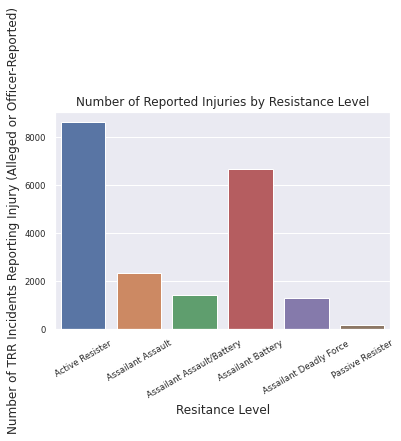

In [103]:
#graphing the sorting of resitance levels where an injury occured we just did
ax = sns.barplot(x = injured_HRL.index, y = injured_HRL, order = injured_HRL.index.sort_values(), label = 'small')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Resitance Level')
ax.set_ylabel('Number of TRR Incidents Reporting Injury (Alleged or Officer-Reported)')
ax.tick_params(labelsize=8.5)
ax.set_title('Number of Reported Injuries by Resistance Level')
plt.show()

We see a similar distribution to the number of trr incidents sorted by resitance level, thus the data here isn't too surprising. Rather, we should look at the percentage of trr incidents reporting injury per each resistance level for some more meaningful data...

In [104]:
#sorting our index for neatness
HRL.sort_index(inplace = True)

In [105]:
#printing the level of resistance and percentage of incidnets resulting in injury at this resistance level
for ind in HRL.index:
    print('Level of Resistance: ' + ind)
    print('Number of Injuries: '+ str(injured_HRL[ind]))
    print('Number of Incidents: '+ str(HRL[ind]))
    print('Percentage of Injuries per Incident: '+str(injured_HRL[ind]/float(HRL[ind])*100)+ '%')
    print('-'*50)

Level of Resistance: Active Resister
Number of Injuries: 8625
Number of Incidents: 30381
Percentage of Injuries per Incident: 28.389453935025184%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Injuries: 2325
Number of Incidents: 9454
Percentage of Injuries per Incident: 24.592764967209646%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Injuries: 1398
Number of Incidents: 4264
Percentage of Injuries per Incident: 32.78611632270169%
--------------------------------------------------
Level of Resistance: Assailant Battery
Number of Injuries: 6652
Number of Incidents: 19634
Percentage of Injuries per Incident: 33.88000407456453%
--------------------------------------------------
Level of Resistance: Assailant Deadly Force
Number of Injuries: 1303
Number of Incidents: 2552
Percentage of Injuries per Incident: 51.057993730407524%
--------------------------------------------------

We see nearly 25% of incidents involving a passive resistor result in injury and 28% involving an active resistor (who doesn't show any signs of threat or assault) result in injury. (Note: when we say "injury", we mean reported or alleged). At the highest level of resistance (Assailant Deadly Force), we see slightly more than half of all such incidents result in injury.

Let's see if we can stratify the above data by race...

In [106]:
df_trr_id_injured.head()

,trr_id,sr_no,se_no,beat,party_fired_first,taser,firearm_used,trr_year,weapon_discharge_yn,list_of_subcats,...,subject_battery_threat,subject_had_weapon,subject_attack_with_weapon,subject_deadly_force,subject_other,subject_armed,injured,alleged_injury,subject_no,event_id
0,4,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
1,5,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,1.0,1
8,13,6.0,6.0,1121,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0.0,0,1,1,5.0,6
9,14,7.0,7.0,1122,NaN,0,0,2004,0,"3.3,",...,0.0,0.0,0.0,0.0,0.0,0,0,1,6.0,7
10,16,8.0,8.0,1331,NaN,0,0,2004,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0,1,1,7.0,8


In [107]:
df_subject_id.head()

,subject_ID,list_of_trr_id,gender,race,age,number_of_trr,age_bands
0,1.0,"4,5,",MALE,HISPANIC,38.0,2,30-39
1,2.0,"7,8,",MALE,BLACK,25.0,2,20-29
2,3.0,"9,",MALE,BLACK,24.0,1,20-29
3,4.0,"10,",MALE,BLACK,21.0,1,20-29
4,5.0,"11,12,",MALE,BLACK,21.0,2,20-29


In [108]:
#putting the race of each subject in each TRR incident in
race_in_trr = {}
for ind in df_subject_id.index:
    trr_str = df_subject_id['list_of_trr_id'][ind]
    race = df_subject_id['race'][ind]
    trr_lizt = trr_str.split(',')[:-1]
    for trr in trr_lizt:
        trr_int = int(trr)
        race_in_trr[trr_int] = race
out = dict(itertools.islice(race_in_trr.items(), N)) 
print(out)

{4: 'HISPANIC', 5: 'HISPANIC', 7: 'BLACK', 8: 'BLACK', 9: 'BLACK', 10: 'BLACK', 11: 'BLACK', 12: 'BLACK', 13: 'BLACK', 14: 'ASIAN/PACIFIC ISLANDER'}


In [109]:
df_trr_id_injured['race'] = ''
df_trr_id['race'] = ''

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
df_trr_id.head()

,trr_id,sr_no,se_no,beat,party_fired_first,taser,firearm_used,trr_year,weapon_discharge_yn,list_of_subcats,...,subject_had_weapon,subject_attack_with_weapon,subject_deadly_force,subject_other,subject_armed,injured,alleged_injury,subject_no,event_id,race
0,4,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0,1,1,1.0,1,
1,5,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0,1,1,1.0,1,
2,7,2.0,2.0,1131,NaN,0,0,2004,1,"4.1,4.2,",...,0.0,0.0,0.0,1.0,0,0,0,2.0,2,
3,8,2.0,2.0,1131,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,1.0,0,0,0,2.0,2,
4,9,3.0,3.0,1112,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0,0,0,3.0,3,


In [111]:
#adding the race feature to the main dataframe and the injured dataframe
for ind in df_trr_id.index:
    trr = df_trr_id['trr_id'][ind]
    df_trr_id['race'][ind] = race_in_trr[trr]
for ind in df_trr_id_injured.index:
    trr = df_trr_id_injured['trr_id'][ind]
    df_trr_id_injured['race'][ind] = race_in_trr[trr]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_

In [112]:
df_trr_id_injured.head()

,trr_id,sr_no,se_no,beat,party_fired_first,taser,firearm_used,trr_year,weapon_discharge_yn,list_of_subcats,...,subject_had_weapon,subject_attack_with_weapon,subject_deadly_force,subject_other,subject_armed,injured,alleged_injury,subject_no,event_id,race
0,4,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0,1,1,1.0,1,HISPANIC
1,5,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0,1,1,1.0,1,HISPANIC
8,13,6.0,6.0,1121,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0,1,1,5.0,6,BLACK
9,14,7.0,7.0,1122,NaN,0,0,2004,0,"3.3,",...,0.0,0.0,0.0,0.0,0,0,1,6.0,7,ASIAN/PACIFIC ISLANDER
10,16,8.0,8.0,1331,NaN,0,0,2004,0,NaN,...,0.0,0.0,0.0,0.0,0,1,1,7.0,8,BLACK


In [113]:
df_trr_id_injured.head()

,trr_id,sr_no,se_no,beat,party_fired_first,taser,firearm_used,trr_year,weapon_discharge_yn,list_of_subcats,...,subject_had_weapon,subject_attack_with_weapon,subject_deadly_force,subject_other,subject_armed,injured,alleged_injury,subject_no,event_id,race
0,4,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0,1,1,1.0,1,HISPANIC
1,5,1.0,1.0,1322,NaN,0,0,2004,0,"4.2,",...,0.0,0.0,0.0,0.0,0,1,1,1.0,1,HISPANIC
8,13,6.0,6.0,1121,NaN,0,0,2004,0,"4.2,3.3,",...,0.0,0.0,0.0,0.0,0,1,1,5.0,6,BLACK
9,14,7.0,7.0,1122,NaN,0,0,2004,0,"3.3,",...,0.0,0.0,0.0,0.0,0,0,1,6.0,7,ASIAN/PACIFIC ISLANDER
10,16,8.0,8.0,1331,NaN,0,0,2004,0,NaN,...,0.0,0.0,0.0,0.0,0,1,1,7.0,8,BLACK


Now that we have a race feature in the TRR ID dataframe, we can do sort a lot of the TRR data by race...

First, we will look at the breakdown of resistance levels across race...

Here, we will lump the race categories of 'Other', 'Asian/Pacific Islander', and 'Native American/Alaskan Native' together into one category called 'Other'. This is because these three catgories are invovled in such few incidents (<0.1% of all resistance levels) to be meaningful by themselves.

*Note, we will do this "Other" grouping very often when we look at trends by race from now on since the aforementioned groups are invovled in very few incidents.*

In [114]:
passive_resister = df_trr_id.loc[df_trr_id.highest_resistance_level == 0]

In [115]:
passive_race = {}
passive_race['BLACK'] = 0
passive_race['WHITE'] = 0
passive_race['HISPANIC'] = 0
passive_race['OTHER'] = 0

for ind in passive_resister.index:
    race = passive_resister['race'][ind]
    if(race == 'OTHER' or race == 'ASIAN/PACIFIC ISLANDER' or race == 'NATIVE AMERICAN/PACIFIC ISLANDER'):
        passive_race['OTHER'] +=1
    else:
        passive_race[race] +=1

In [116]:
print('PERCENTAGE OF \'PASSIVE RESISTER\' BY RACE: \n')
for race in passive_race.keys():
    percentage = str(passive_race[race]/float(len(passive_resister))*100)
    print('Number of Incidents for '+race+' citizens: '+str(passive_race[race]))
    print('Total Number of Incidents where Passive Resister was Highest Resistance: '+str(len(passive_resister)))
    print('Percentage of '+race+' Subjects who were Passive Resisters: '+percentage+'%')
    print('-'*50)


PERCENTAGE OF 'PASSIVE RESISTER' BY RACE: 

Number of Incidents for BLACK citizens: 489
Total Number of Incidents where Passive Resister was Highest Resistance: 726
Percentage of BLACK Subjects who were Passive Resisters: 67.35537190082644%
--------------------------------------------------
Number of Incidents for WHITE citizens: 114
Total Number of Incidents where Passive Resister was Highest Resistance: 726
Percentage of WHITE Subjects who were Passive Resisters: 15.702479338842975%
--------------------------------------------------
Number of Incidents for HISPANIC citizens: 110
Total Number of Incidents where Passive Resister was Highest Resistance: 726
Percentage of HISPANIC Subjects who were Passive Resisters: 15.151515151515152%
--------------------------------------------------
Number of Incidents for OTHER citizens: 13
Total Number of Incidents where Passive Resister was Highest Resistance: 726
Percentage of OTHER Subjects who were Passive Resisters: 1.790633608815427%
--------

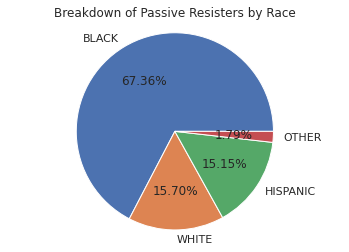

In [117]:
data = list(passive_race.values())
labels = list(passive_race.keys())
plt.pie(data,labels= labels,autopct='%1.2f%%')
plt.title('Breakdown of Passive Resisters by Race')
plt.axis('equal')
plt.show()

In [118]:
active_resister = df_trr_id.loc[df_trr_id.highest_resistance_level == 1]

In [119]:
active_race = {}
active_race['BLACK'] = 0
active_race['WHITE'] = 0
active_race['HISPANIC'] = 0
active_race['OTHER'] = 0

for ind in active_resister.index:
    race = active_resister['race'][ind]
    if(race == 'OTHER' or race == 'ASIAN/PACIFIC ISLANDER' or race == 'NATIVE AMERICAN/ALASKAN NATIVE'):
        active_race['OTHER'] +=1
    else:
        active_race[race] +=1

In [120]:
print('PERCENTAGE OF \'ACTIVE RESISTER\' BY RACE: \n')
for race in active_race.keys():
    percentage = str(active_race[race]/float(len(active_resister))*100)
    print('Number of Incidents for '+race+' citizens: '+str(active_race[race]))
    print('Total Number of Incidents where Active Resister was Highest Resistance: '+str(len(active_resister)))
    print('Percentage of '+race+' Subjects who were Active Resisters: '+percentage+'%')
    print('-'*50)

PERCENTAGE OF 'ACTIVE RESISTER' BY RACE: 

Number of Incidents for BLACK citizens: 22943
Total Number of Incidents where Active Resister was Highest Resistance: 30381
Percentage of BLACK Subjects who were Active Resisters: 75.51759323261248%
--------------------------------------------------
Number of Incidents for WHITE citizens: 2761
Total Number of Incidents where Active Resister was Highest Resistance: 30381
Percentage of WHITE Subjects who were Active Resisters: 9.087916790099076%
--------------------------------------------------
Number of Incidents for HISPANIC citizens: 4033
Total Number of Incidents where Active Resister was Highest Resistance: 30381
Percentage of HISPANIC Subjects who were Active Resisters: 13.274744083473223%
--------------------------------------------------
Number of Incidents for OTHER citizens: 644
Total Number of Incidents where Active Resister was Highest Resistance: 30381
Percentage of OTHER Subjects who were Active Resisters: 2.1197458938152134%
----

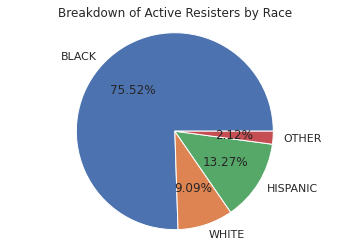

In [121]:
data = list(active_race.values())
labels = list(active_race.keys())
plt.pie(data,labels= labels,autopct='%1.2f%%')
plt.title('Breakdown of Active Resisters by Race')
plt.axis('equal')
plt.show()

In [122]:
assailant_assault = df_trr_id.loc[df_trr_id.highest_resistance_level == 2]

In [123]:
assailant_assault_race = {}
assailant_assault_race['BLACK'] = 0
assailant_assault_race['WHITE'] = 0
assailant_assault_race['HISPANIC'] = 0
assailant_assault_race['OTHER'] = 0

for ind in assailant_assault.index:
    race = assailant_assault['race'][ind]
    if(race == 'OTHER' or race == 'ASIAN/PACIFIC ISLANDER' or race == 'NATIVE AMERICAN/ALASKAN NATIVE'):
        assailant_assault_race['OTHER'] +=1
    else:
        assailant_assault_race[race] +=1

In [124]:
print('PERCENTAGE OF ASSAILANT ASSAULT BY RACE: \n')
for race in assailant_assault_race.keys():
    percentage = str(assailant_assault_race[race]/float(len(assailant_assault))*100)
    print('Number of Incidents for '+race+' citizens: '+str(assailant_assault_race[race]))
    print('Total Number of Incidents where Assailant Assault was Highest Resistance: '+str(len(assailant_assault)))
    print('Percentage of '+race+' Subjects who were Assailant Assaulters: '+percentage+'%')
    print('-'*50)

PERCENTAGE OF ASSAILANT ASSAULT BY RACE: 

Number of Incidents for BLACK citizens: 7018
Total Number of Incidents where Assailant Assault was Highest Resistance: 9454
Percentage of BLACK Subjects who were Assailant Assaulters: 74.23312883435584%
--------------------------------------------------
Number of Incidents for WHITE citizens: 917
Total Number of Incidents where Assailant Assault was Highest Resistance: 9454
Percentage of WHITE Subjects who were Assailant Assaulters: 9.699598053733869%
--------------------------------------------------
Number of Incidents for HISPANIC citizens: 1310
Total Number of Incidents where Assailant Assault was Highest Resistance: 9454
Percentage of HISPANIC Subjects who were Assailant Assaulters: 13.856568648191242%
--------------------------------------------------
Number of Incidents for OTHER citizens: 209
Total Number of Incidents where Assailant Assault was Highest Resistance: 9454
Percentage of OTHER Subjects who were Assailant Assaulters: 2.2107

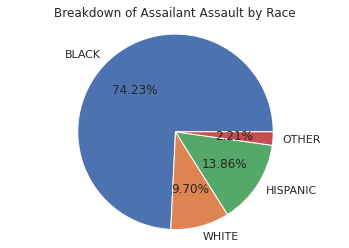

In [125]:
data = list(assailant_assault_race.values())
labels = list(assailant_assault_race.keys())
plt.pie(data,labels= labels,autopct='%1.2f%%')
plt.title('Breakdown of Assailant Assault by Race')
plt.axis('equal')
plt.show()

In [126]:
assailant_ab = df_trr_id.loc[df_trr_id.highest_resistance_level == 3]

In [127]:
assailant_ab_race = {}
assailant_ab_race['BLACK'] = 0
assailant_ab_race['WHITE'] = 0
assailant_ab_race['HISPANIC'] = 0
assailant_ab_race['OTHER'] = 0

for ind in assailant_ab.index:
    race = assailant_ab['race'][ind]
    if(race == 'OTHER' or race == 'ASIAN/PACIFIC ISLANDER' or race == 'NATIVE AMERICAN/ALASKAN NATIVE'):
        assailant_ab_race['OTHER'] +=1
    else:
        assailant_ab_race[race] +=1

In [128]:
print('PERCENTAGE OF ASSAILANT ASSAULT/BATTERY BY RACE: \n')
for race in assailant_ab_race.keys():
    percentage = str(assailant_ab_race[race]/float(len(assailant_ab))*100)
    print('Number of Incidents for '+race+' citizens: '+str(assailant_ab_race[race]))
    print('Total Number of Incidents where Assailant Assault/Battery was Highest Resistance: '+str(len(assailant_ab)))
    print('Percentage of '+race+' Subjects who were Assailant Assaulters/Battery: '+percentage+'%')
    print('-'*50)

PERCENTAGE OF ASSAILANT ASSAULT/BATTERY BY RACE: 

Number of Incidents for BLACK citizens: 3146
Total Number of Incidents where Assailant Assault/Battery was Highest Resistance: 4264
Percentage of BLACK Subjects who were Assailant Assaulters/Battery: 73.78048780487805%
--------------------------------------------------
Number of Incidents for WHITE citizens: 366
Total Number of Incidents where Assailant Assault/Battery was Highest Resistance: 4264
Percentage of WHITE Subjects who were Assailant Assaulters/Battery: 8.583489681050658%
--------------------------------------------------
Number of Incidents for HISPANIC citizens: 684
Total Number of Incidents where Assailant Assault/Battery was Highest Resistance: 4264
Percentage of HISPANIC Subjects who were Assailant Assaulters/Battery: 16.04127579737336%
--------------------------------------------------
Number of Incidents for OTHER citizens: 68
Total Number of Incidents where Assailant Assault/Battery was Highest Resistance: 4264
Perce

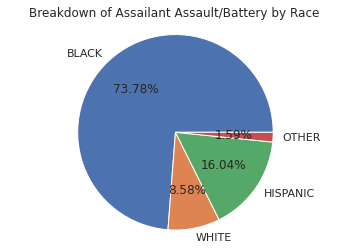

In [129]:
data = list(assailant_ab_race.values())
labels = list(assailant_ab_race.keys())
plt.pie(data,labels= labels,autopct='%1.2f%%')
plt.title('Breakdown of Assailant Assault/Battery by Race')
plt.axis('equal')
plt.show()

In [130]:
assailant_battery = df_trr_id.loc[df_trr_id.highest_resistance_level == 4]

In [131]:
assailant_battery_race = {}
assailant_battery_race['BLACK'] = 0
assailant_battery_race['WHITE'] = 0
assailant_battery_race['HISPANIC'] = 0
assailant_battery_race['OTHER'] = 0

for ind in assailant_battery.index:
    race = assailant_battery['race'][ind]
    if(race == 'OTHER' or race == 'ASIAN/PACIFIC ISLANDER' or race == 'NATIVE AMERICAN/ALASKAN NATIVE'):
        assailant_battery_race['OTHER'] +=1
    else:
        assailant_battery_race[race] +=1

In [132]:
print('PERCENTAGE OF ASSAILANT BATTERY BY RACE: \n')
for race in assailant_battery_race.keys():
    percentage = str(assailant_battery_race[race]/float(len(assailant_battery))*100)
    print('Number of Incidents for '+race+' citizens: '+str(assailant_battery_race[race]))
    print('Total Number of Incidents where Assailant Battery was Highest Resistance: '+str(len(assailant_battery)))
    print('Percentage of '+race+' Subjects who were Assailants committing Battery: '+percentage+'%')
    print('-'*50)

PERCENTAGE OF ASSAILANT BATTERY BY RACE: 

Number of Incidents for BLACK citizens: 14270
Total Number of Incidents where Assailant Battery was Highest Resistance: 19634
Percentage of BLACK Subjects who were Assailants committing Battery: 72.68004482020984%
--------------------------------------------------
Number of Incidents for WHITE citizens: 2153
Total Number of Incidents where Assailant Battery was Highest Resistance: 19634
Percentage of WHITE Subjects who were Assailants committing Battery: 10.965671793827035%
--------------------------------------------------
Number of Incidents for HISPANIC citizens: 2836
Total Number of Incidents where Assailant Battery was Highest Resistance: 19634
Percentage of HISPANIC Subjects who were Assailants committing Battery: 14.444331262096362%
--------------------------------------------------
Number of Incidents for OTHER citizens: 375
Total Number of Incidents where Assailant Battery was Highest Resistance: 19634
Percentage of OTHER Subjects who

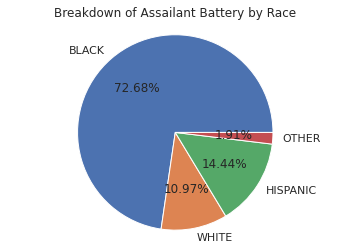

In [133]:
data = list(assailant_battery_race.values())
labels = list(assailant_battery_race.keys())
plt.pie(data,labels= labels,autopct='%1.2f%%')
plt.title('Breakdown of Assailant Battery by Race')
plt.axis('equal')
plt.show()

In [134]:
deadly = df_trr_id.loc[df_trr_id.highest_resistance_level == 5]

In [135]:
deadly_race = {}
deadly_race['BLACK'] = 0
deadly_race['WHITE'] = 0
deadly_race['HISPANIC'] = 0
deadly_race['OTHER'] = 0

for ind in deadly.index:
    race = deadly['race'][ind]
    if(race == 'OTHER' or race == 'ASIAN/PACIFIC ISLANDER' or race == 'NATIVE AMERICAN/ALASKAN NATIVE'):
        deadly_race['OTHER'] +=1
    else:
        deadly_race[race] +=1

In [136]:
print('PERCENTAGE OF ASSAILANT DEADLY FORCE BY RACE: \n')
for race in deadly_race.keys():
    percentage = str(deadly_race[race]/float(len(deadly))*100)
    print('Number of Incidents for '+race+' citizens: '+str(deadly_race[race]))
    print('Total Number of Incidents where Assailant Deadly Force was Highest Resistance: '+str(len(deadly)))
    print('Percentage of '+race+' Subjects who were Assailants presenting Deadly Force: '+percentage+'%')
    print('-'*50)

PERCENTAGE OF ASSAILANT DEADLY FORCE BY RACE: 

Number of Incidents for BLACK citizens: 1863
Total Number of Incidents where Assailant Deadly Force was Highest Resistance: 2552
Percentage of BLACK Subjects who were Assailants presenting Deadly Force: 73.00156739811912%
--------------------------------------------------
Number of Incidents for WHITE citizens: 221
Total Number of Incidents where Assailant Deadly Force was Highest Resistance: 2552
Percentage of WHITE Subjects who were Assailants presenting Deadly Force: 8.659874608150469%
--------------------------------------------------
Number of Incidents for HISPANIC citizens: 402
Total Number of Incidents where Assailant Deadly Force was Highest Resistance: 2552
Percentage of HISPANIC Subjects who were Assailants presenting Deadly Force: 15.752351097178682%
--------------------------------------------------
Number of Incidents for OTHER citizens: 66
Total Number of Incidents where Assailant Deadly Force was Highest Resistance: 2552
P

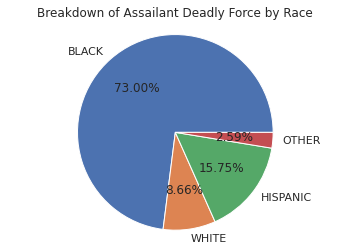

In [137]:
data = list(deadly_race.values())
labels = list(deadly_race.keys())
plt.pie(data,labels= labels,autopct='%1.2f%%')
plt.title('Breakdown of Assailant Deadly Force by Race')
plt.axis('equal')
plt.show()

Key Takeaways:
* Blacks, Hispanics, and Whites are the predominant races of subject invovled in TRR incidents. Even when we combine Other, Asian, and Native American into one category, they are still less than 5% of each resistance level
* Blacks subjects make up a large majority of each resistance levels (~75%)
* Hispanic subjects usually make up around 15% of each resistance level, white subjects are about 8% of each resistance level

Preliminary Prediction:
* The prominence of Black subjects at each resistance level would seem to suggest they are invovled in a greater amount of police brutality incidents, likely due to their prominence at each resistance level. As we would expect police to take reasonable action against all subjects showing a certain level of resistance, Black citizens will likely be involved in more injuries/police brutaility instances if we assume these events occur with even the slightest level of regularity. Thus, for every subject who presents signs of resistance in any capacity, we would expect a Black citizen to be invovled roughly 3/4 of the time, and thus be 3/4 as likely to be the victim of a police-related injury

Now, we will look at the breakdown of resistance levels across race, within each race (i.e. the number of Black Active Resisters/Number of Black TRR Subjects)

In [138]:
#BLACK
black_all = df_trr_id.loc[df_trr_id.race == 'BLACK']
black_denom = len(black_all)
#print(black_denom)
black_num = black_all.highest_resistance_level.value_counts()
black_num.sort_index(inplace = True)
#print(black_num)
print('BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST BLACK CITIZENS')
print()
for ind in black_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Incidents at this Resistance: '+ str(black_num[ind]))
    print('Number of Total Incidents Against BLACK Citizens: '+ str(black_denom))
    print('Percentage of Total Inicidents at this Resistnace: '+str(black_num[ind]/float(black_denom)*100)+ '%')
    print('-'*50)

BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST BLACK CITIZENS

Level of Resistance: Passive Resister
Number of Incidents at this Resistance: 489
Number of Total Incidents Against BLACK Citizens: 49733
Percentage of Total Inicidents at this Resistnace: 0.983250557979611%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Incidents at this Resistance: 22943
Number of Total Incidents Against BLACK Citizens: 49733
Percentage of Total Inicidents at this Resistnace: 46.132346731546455%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Incidents at this Resistance: 7018
Number of Total Incidents Against BLACK Citizens: 49733
Percentage of Total Inicidents at this Resistnace: 14.111354633744194%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Incidents at this Resistance: 3146
Number of Total Incidents Against BLACK Citizens: 49733
Percenta

In [139]:
#HISPANIC
hispanic_all = df_trr_id.loc[df_trr_id.race == 'HISPANIC']
hispanic_denom = len(hispanic_all)
#print(hispanic_denom)
hispanic_num = hispanic_all.highest_resistance_level.value_counts()
hispanic_num.sort_index(inplace = True)
#print(hispanic_num)
print('BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST HISPANIC CITIZENS')
print()
for ind in hispanic_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Incidents at this Resistance: '+ str(hispanic_num[ind]))
    print('Number of Total Incidents Against HISPANIC Citizens: '+ str(hispanic_denom))
    print('Percentage of Total Incidents at this Resistance: '+str(hispanic_num[ind]/float(hispanic_denom)*100)+ '%')
    print('-'*50)

BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST HISPANIC CITIZENS

Level of Resistance: Passive Resister
Number of Incidents at this Resistance: 110
Number of Total Incidents Against HISPANIC Citizens: 9376
Percentage of Total Incidents at this Resistance: 1.1732081911262797%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Incidents at this Resistance: 4033
Number of Total Incidents Against HISPANIC Citizens: 9376
Percentage of Total Incidents at this Resistance: 43.014078498293514%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Incidents at this Resistance: 1310
Number of Total Incidents Against HISPANIC Citizens: 9376
Percentage of Total Incidents at this Resistance: 13.971843003412971%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Incidents at this Resistance: 684
Number of Total Incidents Against HISPANIC Citizens: 9376
P

In [140]:
#WHITE
white_all = df_trr_id.loc[df_trr_id.race == 'WHITE']
white_denom = len(white_all)
#print(white_denom)
white_num = white_all.highest_resistance_level.value_counts()
white_num.sort_index(inplace = True)
#print(white_num)
print('BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST WHITE CITIZENS')
print()
for ind in white_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Incidents at this Resistance: '+ str(white_num[ind]))
    print('Number of Total Incidents Against WHITE Citizens: '+ str(white_denom))
    print('Percentage of Incidents at this Resistance: '+str(white_num[ind]/float(white_denom)*100)+ '%')
    print('-'*50)

BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST WHITE CITIZENS

Level of Resistance: Passive Resister
Number of Incidents at this Resistance: 114
Number of Total Incidents Against WHITE Citizens: 6535
Percentage of Incidents at this Resistance: 1.7444529456771232%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Incidents at this Resistance: 2761
Number of Total Incidents Against WHITE Citizens: 6535
Percentage of Incidents at this Resistance: 42.24942616679419%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Incidents at this Resistance: 917
Number of Total Incidents Against WHITE Citizens: 6535
Percentage of Incidents at this Resistance: 14.03213465952563%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Incidents at this Resistance: 366
Number of Total Incidents Against WHITE Citizens: 6535
Percentage of Incidents at this Resis

In [141]:
#OTHER
other_all = df_trr_id.loc[df_trr_id.race == 'OTHER']
other_denom = len(other_all)
#print(other_denom)
other_num = other_all.highest_resistance_level.value_counts()
other_num.sort_index(inplace = True)
#print(other_num)
print('BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST \'OTHER\' CITIZENS')
print()
for ind in other_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Incidents at this Resistance: '+ str(other_num[ind]))
    print('Number of Total Incidents Against \'OTHER\' Citizens: '+ str(other_denom))
    print('Percentage of Incidents at this Resistance: '+str(other_num[ind]/float(other_denom)*100)+ '%')
    print('-'*50)

BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST 'OTHER' CITIZENS

Level of Resistance: Passive Resister
Number of Incidents at this Resistance: 8
Number of Total Incidents Against 'OTHER' Citizens: 891
Percentage of Incidents at this Resistance: 0.8978675645342313%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Incidents at this Resistance: 410
Number of Total Incidents Against 'OTHER' Citizens: 891
Percentage of Incidents at this Resistance: 46.01571268237935%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Incidents at this Resistance: 136
Number of Total Incidents Against 'OTHER' Citizens: 891
Percentage of Incidents at this Resistance: 15.26374859708193%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Incidents at this Resistance: 49
Number of Total Incidents Against 'OTHER' Citizens: 891
Percentage of Incidents at this Res

In [142]:
#ASIAN/PACIFIC ISLANDER
asian_all = df_trr_id.loc[df_trr_id.race == 'ASIAN/PACIFIC ISLANDER']
asian_denom = len(asian_all)
#print(asian_denom)
asian_num = asian_all.highest_resistance_level.value_counts()
asian_num.sort_index(inplace = True)
#print(asian_num)
print('BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST ASIAN/PACIFIC ISLANDER CITIZENS')
print()
for ind in asian_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Incidents at this Resistance: '+ str(asian_num[ind]))
    print('Number of Total Incidents Against ASIAN Citizens: '+ str(asian_denom))
    print('Percentage of Incidents at this Resistance: '+str(asian_num[ind]/float(asian_denom)*100)+ '%')
    print('-'*50)

BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST ASIAN/PACIFIC ISLANDER CITIZENS

Level of Resistance: Passive Resister
Number of Incidents at this Resistance: 5
Number of Total Incidents Against ASIAN Citizens: 430
Percentage of Incidents at this Resistance: 1.1627906976744187%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Incidents at this Resistance: 210
Number of Total Incidents Against ASIAN Citizens: 430
Percentage of Incidents at this Resistance: 48.837209302325576%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Incidents at this Resistance: 67
Number of Total Incidents Against ASIAN Citizens: 430
Percentage of Incidents at this Resistance: 15.58139534883721%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Incidents at this Resistance: 16
Number of Total Incidents Against ASIAN Citizens: 430
Percentage of Incidents at t

In [143]:
#NATIVE AMERICAN/ALASKAN NATIVE
native_all = df_trr_id.loc[df_trr_id.race == 'NATIVE AMERICAN/ALASKAN NATIVE']
native_denom = len(native_all)
#print(native_denom)
native_num = native_all.highest_resistance_level.value_counts()
for i in range (0,6):
    key = float(i)
    if key not in native_num.keys():
        native_num[key] = 0
native_num.sort_index(inplace = True)
#print(native_num)
print('BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST NATIVE AMERICAN/ALASKAN NATIVE CITIZENS')
print()
for ind in native_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Incidents at this Resistance: '+ str(native_num[ind]))
    print('Number of Total Incidents Against NATIVE AMERICAN Citizens: '+ str(native_denom))
    print('Percentage of Incidents at this Resistance: '+str(native_num[ind]/float(native_denom)*100)+ '%')
    print('-'*50)

BREAKDOWN OF HIGHEST RESISTANCE LEVEL AMONGST NATIVE AMERICAN/ALASKAN NATIVE CITIZENS

Level of Resistance: Passive Resister
Number of Incidents at this Resistance: 0
Number of Total Incidents Against NATIVE AMERICAN Citizens: 54
Percentage of Incidents at this Resistance: 0.0%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Incidents at this Resistance: 24
Number of Total Incidents Against NATIVE AMERICAN Citizens: 54
Percentage of Incidents at this Resistance: 44.44444444444444%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Incidents at this Resistance: 6
Number of Total Incidents Against NATIVE AMERICAN Citizens: 54
Percentage of Incidents at this Resistance: 11.11111111111111%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Incidents at this Resistance: 3
Number of Total Incidents Against NATIVE AMERICAN Citizens: 54
Per

We will graph all the above data side-by-side. In order to do this, we will compress the 'Other', Asain/Pacific Islander, and Native American data together into the 'Other' category...

In [144]:
#NOTE: 'OTHER' category is now Other, Asian, and Native American combined
#putpercetnage data into dicts for graphing acess
black_dict ={}
hispanic_dict = {}
white_dict = {}
other_dict = {}
for i in range (0,6):
    key = float(i)
    black_dict[key] = black_num[key]/black_denom*100
    hispanic_dict[key] = hispanic_num[key]/hispanic_denom*100
    white_dict[key] = white_num[key]/white_denom*100
    other_dict[key] = (other_num[key]+asian_num[key]+native_num[key])/(other_denom+asian_denom+native_denom)*100
print(black_dict)
print(hispanic_dict)
print(white_dict)
print(other_dict)

{0.0: 0.983250557979611, 1.0: 46.132346731546455, 2.0: 14.111354633744194, 3.0: 6.32577966340257, 4.0: 28.693221804435687, 5.0: 3.7460036595419544}
{0.0: 1.1732081911262797, 1.0: 43.014078498293514, 2.0: 13.971843003412971, 3.0: 7.2952218430034135, 4.0: 30.24744027303754, 5.0: 4.287542662116041}
{0.0: 1.7444529456771232, 1.0: 42.24942616679419, 2.0: 14.03213465952563, 3.0: 5.600612088752869, 4.0: 32.94567712318286, 5.0: 3.3817903596021424}
{0.0: 0.9454545454545455, 1.0: 46.836363636363636, 2.0: 15.2, 3.0: 4.945454545454545, 4.0: 27.27272727272727, 5.0: 4.8}


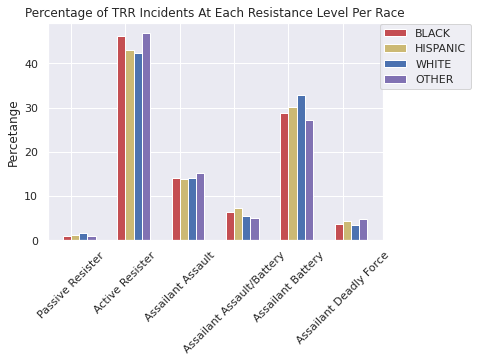

In [145]:
#graph above data
n = 6
index = np.arange(n)
width = .15
fig, ax = plt.subplots()
y1 = list(black_dict.values())
y2 = list(hispanic_dict.values())
y3 = list(white_dict.values())
y4 = list(other_dict.values())
rects1 = ax.bar(index, y1, width, color='r')
rects2 = ax.bar(index + width, y2, width, color='y')
rects3 = ax.bar(index + 2*width, y3, width, color='b')
rects4 = ax.bar(index + 3*width, y4, width, color='m')
ax.set_ylabel('Percetange')
ax.set_title('Percentage of TRR Incidents At Each Resistance Level Per Race')
ax.set_xticks(index + width / 2)
#ax.xticks(rotation=90)
ax.set_xticklabels(('Passive Resister', 'Active Resister', 'Assailant Assault', 'Assailant Assault/Battery', 'Assailant Battery', 'Assailant Deadly Force'), rotation = 45)
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('BLACK', 'HISPANIC', 'WHITE', 'OTHER'), bbox_to_anchor=(1.28, 1.02))
plt.show()

To clear up some confusion (I graphed the wrong data here and too lazy to change it), the percentages graphed represent the number of resisters of that race at that given resistance level divided by the number of total resisters in that RACE. (i.e. the number of Black Active Resisters/Number of Black TRR Subjects)

Key Takeaways:
* We see that at each level of resistance, the percentage of incidents with the given level of resistance as its highest level of resistance within each race is relatively equal
    * What this means, in essence, is that each race has relatively the same percentage of Active Resistors, Assailant Assaulters, etc. 
* There are minor spikes in races for each resistance level (Blacks and Others in Acitve Resister, Whites in Assailant Battery), but very few are significant
* The majority of levels of resistance in each race where Active Resisters or Assailant Battery (the two 'intermediate' levels), while the least common levels of resistance where Passive Resister and Assailant Deadly Force (the two extreme levels, so to speak)

In [146]:
#breakdown of trr with injuries by race
race_inj_num = df_trr_id_injured.race.value_counts()

The above output tells us the breakdown of injuries (again, officer-reported or alleged) across all TRR incidents, sorted by race.

We can't glean much from this data since the breakdown is identical to the number of crimes and TRR incidents when broken down by race (i.e. Black citizens are invovled in more crimes, arrests, and TRR incidents than the other races, Native Americans the least). Thus, we will look at percentages again...

In [147]:
#breakdown of incidents with an injury by race
race_inj_denom = df_trr_id.race.value_counts()
print(race_inj_denom)

BLACK                             49733
HISPANIC                           9376
WHITE                              6535
OTHER                               891
ASIAN/PACIFIC ISLANDER              430
NATIVE AMERICAN/ALASKAN NATIVE       54
Name: race, dtype: int64


In [148]:
#printing out the brekadown percetnage of trr's resulting in injury by race
for ind in race_inj_num.index:
    print('Race: ' + ind)
    print('Number of Injuries involving '+ind+' citizens: '+ str(race_inj_num[ind]))
    print('Number of Incidents involving '+ind+' citizens: '+ str(race_inj_denom[ind]))
    print('Percentage of Injuries per Incident: '+str(race_inj_num[ind]/float(race_inj_denom[ind])*100)+ '%')
    print('-'*50)

Race: BLACK
Number of Injuries involving BLACK citizens: 14261
Number of Incidents involving BLACK citizens: 49733
Percentage of Injuries per Incident: 28.67512516839925%
--------------------------------------------------
Race: HISPANIC
Number of Injuries involving HISPANIC citizens: 3495
Number of Incidents involving HISPANIC citizens: 9376
Percentage of Injuries per Incident: 37.276023890784984%
--------------------------------------------------
Race: WHITE
Number of Injuries involving WHITE citizens: 2313
Number of Incidents involving WHITE citizens: 6535
Percentage of Injuries per Incident: 35.394032134659525%
--------------------------------------------------
Race: OTHER
Number of Injuries involving OTHER citizens: 274
Number of Incidents involving OTHER citizens: 891
Percentage of Injuries per Incident: 30.751964085297416%
--------------------------------------------------
Race: ASIAN/PACIFIC ISLANDER
Number of Injuries involving ASIAN/PACIFIC ISLANDER citizens: 135
Number of Inc

The percetnage of injuires amongst black civilians is roughly 6% lower to all other ethnic groups (excluding Native Americans) on average. This is certainly surprising at first glance, but we must take into account the fact that our raw data (which is police-reported) could hold some inital bias, possibly racially. Keeping that in mind, let's isolate each racial group and look at the percentage of injuries among incidents when we categorize by the highest reported subject resistance level...

In [149]:
#BLACK
black_all = df_trr_id.loc[df_trr_id.race == 'BLACK']
black_injured = df_trr_id_injured.loc[df_trr_id_injured.race == 'BLACK']
black_denom = black_all.highest_resistance_level.value_counts()
#print(black_denom)
black_num = black_injured.highest_resistance_level.value_counts()
black_num.sort_index(inplace = True)
#print(black_num)
print('PERCENTAGE OF INJURIES AMONGST BLACK CITIZENS PER RESISTANCE LEVEL')
print()
for ind in black_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Injuries: '+ str(black_num[ind]))
    print('Number of Incidents: '+ str(black_denom[ind]))
    print('Percentage of Injuries per Incident: '+str(black_num[ind]/float(black_denom[ind])*100)+ '%')
    print('-'*50)

PERCENTAGE OF INJURIES AMONGST BLACK CITIZENS PER RESISTANCE LEVEL

Level of Resistance: Passive Resister
Number of Injuries: 106
Number of Incidents: 489
Percentage of Injuries per Incident: 21.676891615541923%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Injuries: 6063
Number of Incidents: 22943
Percentage of Injuries per Incident: 26.426360981563%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Injuries: 1568
Number of Incidents: 7018
Percentage of Injuries per Incident: 22.342547734397264%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Injuries: 969
Number of Incidents: 3146
Percentage of Injuries per Incident: 30.801017164653526%
--------------------------------------------------
Level of Resistance: Assailant Battery
Number of Injuries: 4596
Number of Incidents: 14270
Percentage of Injuries per Incident: 32.207428170

In [150]:
#HISPANIC
hispanic_all = df_trr_id.loc[df_trr_id.race == 'HISPANIC']
hispanic_injured = df_trr_id_injured.loc[df_trr_id_injured.race == 'HISPANIC']
hispanic_denom = hispanic_all.highest_resistance_level.value_counts()
#print(hispanic_denom)
hispanic_num = hispanic_injured.highest_resistance_level.value_counts()
hispanic_num.sort_index(inplace = True)
#print(hispanic_num)
print('PERCENTAGE OF INJURIES AMONGST HISPANIC CITIZENS PER RESISTANCE LEVEL')
print()
for ind in hispanic_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Injuries: '+ str(hispanic_num[ind]))
    print('Number of Incidents: '+ str(hispanic_denom[ind]))
    print('Percentage of Injuries per Incident: '+str(hispanic_num[ind]/float(hispanic_denom[ind])*100)+ '%')
    print('-'*50)

PERCENTAGE OF INJURIES AMONGST HISPANIC CITIZENS PER RESISTANCE LEVEL

Level of Resistance: Passive Resister
Number of Injuries: 25
Number of Incidents: 110
Percentage of Injuries per Incident: 22.727272727272727%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Injuries: 1456
Number of Incidents: 4033
Percentage of Injuries per Incident: 36.10215720307464%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Injuries: 417
Number of Incidents: 1310
Percentage of Injuries per Incident: 31.832061068702288%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Injuries: 265
Number of Incidents: 684
Percentage of Injuries per Incident: 38.74269005847953%
--------------------------------------------------
Level of Resistance: Assailant Battery
Number of Injuries: 1136
Number of Incidents: 2836
Percentage of Injuries per Incident: 40.0564174894

In [151]:
#WHITE
white_all = df_trr_id.loc[df_trr_id.race == 'WHITE']
white_injured = df_trr_id_injured.loc[df_trr_id_injured.race == 'WHITE']
white_denom = white_all.highest_resistance_level.value_counts()
#print(white_denom)
white_num = white_injured.highest_resistance_level.value_counts()
white_num.sort_index(inplace = True)
#print(white_num)
print('PERCENTAGE OF INJURIES AMONGST WHITE CITIZENS PER RESISTANCE LEVEL')
print()
for ind in white_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Injuries: '+ str(white_num[ind]))
    print('Number of Incidents: '+ str(white_denom[ind]))
    print('Percentage of Injuries per Incident: '+str(white_num[ind]/float(white_denom[ind])*100)+ '%')
    print('-'*50)

PERCENTAGE OF INJURIES AMONGST WHITE CITIZENS PER RESISTANCE LEVEL

Level of Resistance: Passive Resister
Number of Injuries: 44
Number of Incidents: 114
Percentage of Injuries per Incident: 38.59649122807017%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Injuries: 917
Number of Incidents: 2761
Percentage of Injuries per Incident: 33.212604128938786%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Injuries: 278
Number of Incidents: 917
Percentage of Injuries per Incident: 30.31624863685932%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Injuries: 144
Number of Incidents: 366
Percentage of Injuries per Incident: 39.34426229508197%
--------------------------------------------------
Level of Resistance: Assailant Battery
Number of Injuries: 802
Number of Incidents: 2153
Percentage of Injuries per Incident: 37.250348351137944%


In [152]:
#OTHER
other_all = df_trr_id.loc[df_trr_id.race == 'OTHER']
other_injured = df_trr_id_injured.loc[df_trr_id_injured.race == 'OTHER']
other_denom = other_all.highest_resistance_level.value_counts()
#print(other_denom)
other_num = other_injured.highest_resistance_level.value_counts()
other_num.sort_index(inplace = True)
#print(other_num)
print('PERCENTAGE OF INJURIES AMONGST \'OTHER\' CITIZENS PER RESISTANCE LEVEL')
print()
for ind in other_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Injuries: '+ str(other_num[ind]))
    print('Number of Incidents: '+ str(other_denom[ind]))
    print('Percentage of Injuries per Incident: '+str(other_num[ind]/float(other_denom[ind])*100)+ '%')
    print('-'*50)

PERCENTAGE OF INJURIES AMONGST 'OTHER' CITIZENS PER RESISTANCE LEVEL

Level of Resistance: Passive Resister
Number of Injuries: 2
Number of Incidents: 8
Percentage of Injuries per Incident: 25.0%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Injuries: 117
Number of Incidents: 410
Percentage of Injuries per Incident: 28.536585365853657%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Injuries: 39
Number of Incidents: 136
Percentage of Injuries per Incident: 28.676470588235293%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Injuries: 12
Number of Incidents: 49
Percentage of Injuries per Incident: 24.489795918367346%
--------------------------------------------------
Level of Resistance: Assailant Battery
Number of Injuries: 90
Number of Incidents: 248
Percentage of Injuries per Incident: 36.29032258064516%
-------------------

In [153]:
#ASIAN/PACIFIC ISLANDER
asian_all = df_trr_id.loc[df_trr_id.race == 'ASIAN/PACIFIC ISLANDER']
asian_injured = df_trr_id_injured.loc[df_trr_id_injured.race == 'ASIAN/PACIFIC ISLANDER']
asian_denom = asian_all.highest_resistance_level.value_counts()
#print(asian_denom)
asian_num = asian_injured.highest_resistance_level.value_counts()
asian_num.sort_index(inplace = True)
#print(asian_num)
print('PERCENTAGE OF INJURIES AMONGST ASIAN/PACIFIC ISLANDER CITIZENS PER RESISTANCE LEVEL')
print()
for ind in asian_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Injuries: '+ str(asian_num[ind]))
    print('Number of Incidents: '+ str(asian_denom[ind]))
    print('Percentage of Injuries per Incident: '+str(asian_num[ind]/float(asian_denom[ind])*100)+ '%')
    print('-'*50)

PERCENTAGE OF INJURIES AMONGST ASIAN/PACIFIC ISLANDER CITIZENS PER RESISTANCE LEVEL

Level of Resistance: Passive Resister
Number of Injuries: 3
Number of Incidents: 5
Percentage of Injuries per Incident: 60.0%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Injuries: 68
Number of Incidents: 210
Percentage of Injuries per Incident: 32.38095238095238%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Injuries: 21
Number of Incidents: 67
Percentage of Injuries per Incident: 31.343283582089555%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Injuries: 8
Number of Incidents: 16
Percentage of Injuries per Incident: 50.0%
--------------------------------------------------
Level of Resistance: Assailant Battery
Number of Injuries: 24
Number of Incidents: 108
Percentage of Injuries per Incident: 22.22222222222222%
----------------------

In [154]:
#NATIVE AMERICAN/ALASKAN NATIVE
native_all = df_trr_id.loc[df_trr_id.race == 'NATIVE AMERICAN/ALASKAN NATIVE']
native_injured = df_trr_id_injured.loc[df_trr_id_injured.race == 'NATIVE AMERICAN/ALASKAN NATIVE']
native_denom = native_all.highest_resistance_level.value_counts()
#print(native_denom)
native_num = native_injured.highest_resistance_level.value_counts()
native_num.sort_index(inplace = True)
#print(native_num)
for i in range (0,6):
    key = float(i)
    if key not in native_num.keys():
        native_num[key] = 0
        native_denom[key] = 0
print('PERCENTAGE OF INJURIES AMONGST NATIVE AMERICAN/ALASKAN NATIVE CITIZENS PER RESISTANCE LEVEL')
print()
for ind in black_num.index:
    print('Level of Resistance: ' + str(rl_dict[ind]))
    print('Number of Injuries: '+ str(native_num[ind]))
    print('Number of Incidents: '+ str(native_denom[ind]))
    if native_denom[ind] == 0:
        print('Percentage of Injuries per Incident: 0%')
    else:
        print('Percentage of Injuries per Incident: '+str(native_num[ind]/float(native_denom[ind])*100)+ '%')
    print('-'*50)

PERCENTAGE OF INJURIES AMONGST NATIVE AMERICAN/ALASKAN NATIVE CITIZENS PER RESISTANCE LEVEL

Level of Resistance: Passive Resister
Number of Injuries: 0
Number of Incidents: 0
Percentage of Injuries per Incident: 0%
--------------------------------------------------
Level of Resistance: Active Resister
Number of Injuries: 4
Number of Incidents: 24
Percentage of Injuries per Incident: 16.666666666666664%
--------------------------------------------------
Level of Resistance: Assailant Assault
Number of Injuries: 2
Number of Incidents: 6
Percentage of Injuries per Incident: 33.33333333333333%
--------------------------------------------------
Level of Resistance: Assailant Assault/Battery
Number of Injuries: 0
Number of Incidents: 0
Percentage of Injuries per Incident: 0%
--------------------------------------------------
Level of Resistance: Assailant Battery
Number of Injuries: 4
Number of Incidents: 19
Percentage of Injuries per Incident: 21.052631578947366%
--------------------------

We are going to graph the above data for each resitance level, but we will omit combine Native American group with the Asian group and the Other group since they have so few incidents compared to the other 3 groups and could produce very skewed data...

In [155]:
#NOTE: 'OTHER' category is now Other, Asian, and Native American combined
black_dict ={}
hispanic_dict = {}
white_dict = {}
other_dict = {}
for i in range (0,6):
    key = float(i)
    black_dict[key] = black_num[key]/black_denom[key]*100
    hispanic_dict[key] = hispanic_num[key]/hispanic_denom[key]*100
    white_dict[key] = white_num[key]/white_denom[key]*100
    other_dict[key] = (other_num[key]+asian_num[key]+native_num[key])/(other_denom[key]+asian_denom[key]+native_denom[key])*100
print(black_dict)
print(hispanic_dict)
print(white_dict)
print(other_dict)

{0.0: 21.676891615541923, 1.0: 26.426360981563, 2.0: 22.342547734397264, 3.0: 30.801017164653526, 4.0: 32.20742817098809, 5.0: 51.315083199141164}
{0.0: 22.727272727272727, 1.0: 36.10215720307464, 2.0: 31.832061068702288, 3.0: 38.74269005847953, 4.0: 40.05641748942172, 5.0: 48.756218905472636}
{0.0: 38.59649122807017, 1.0: 33.212604128938786, 2.0: 30.31624863685932, 3.0: 39.34426229508197, 4.0: 37.250348351137944, 5.0: 57.01357466063348}
{0.0: 38.46153846153847, 1.0: 29.347826086956523, 2.0: 29.665071770334926, 3.0: 30.76923076923077, 4.0: 31.466666666666665, 5.0: 39.0625}


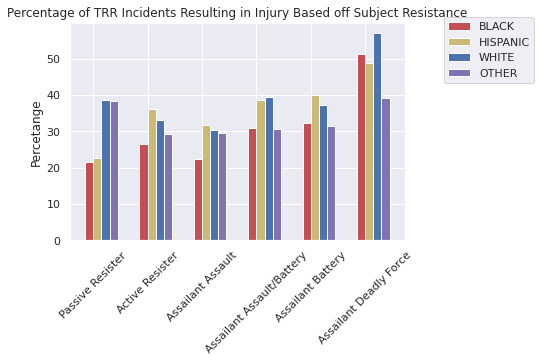

In [156]:
n = 6
index = np.arange(n)
width = .15
fig, ax = plt.subplots()
y1 = list(black_dict.values())
y2 = list(hispanic_dict.values())
y3 = list(white_dict.values())
y4 = list(other_dict.values())
rects1 = ax.bar(index, y1, width, color='r')
rects2 = ax.bar(index + width, y2, width, color='y')
rects3 = ax.bar(index + 2*width, y3, width, color='b')
rects4 = ax.bar(index + 3*width, y4, width, color='m')
ax.set_ylabel('Percetange')
ax.set_title('Percentage of TRR Incidents Resulting in Injury Based off Subject Resistance')
ax.set_xticks(index + width / 2)
#ax.xticks(rotation=90)
ax.set_xticklabels(('Passive Resister', 'Active Resister', 'Assailant Assault', 'Assailant Assault/Battery', 'Assailant Battery', 'Assailant Deadly Force'), rotation = 45)
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('BLACK', 'HISPANIC', 'WHITE', 'OTHER'), bbox_to_anchor=(1.1, 1.05))
plt.show()

Key Takeaways: 

* Altough this is just the last graph we created with a little refinement, it's still very surprising to see Black citizens having the lowest percentage of injuries per police encounter across nearly all resitance levels
* Rather, we see Hispanic and White citizens having the highest percentages of injuries per police encounter, especially at the lower levels of resistance where we would presume racial profiling would be more prevelant
* One issue that continues to irk is the possible inconsistency/inaccuracy of our RAW data. After all, these reports were filed by police officers themselves and if the last month has taught us anything, it is that the police don't always hold all suspects to the same standard. Thus, we suspect officers may not report an injury for certain racial groups when an injury did occur. 

Perhaps, it will be helpful to look at the beats with the most amount of injuries and cross-reference with the beats with the most number of crimes/arrests/arrest to crime ratio...

In [157]:
beat_injury = df_trr_id_injured.beat.value_counts()

In [158]:
#create counter for the 20 beats with highest number of injuries
top20_injured = {}
for beat in beat_injury.index[:20]:
    top20_injured[beat] = beat_injury[beat]
print(top20_injured)

{1134: 295, 621: 233, 1112: 229, 1533: 221, 713: 218, 1522: 201, 624: 193, 1824: 188, 1531: 183, 531: 180, 1133: 172, 421: 167, 321: 167, 1132: 163, 1121: 161, 2515: 160, 1024: 158, 823: 156, 1122: 152, 522: 149}


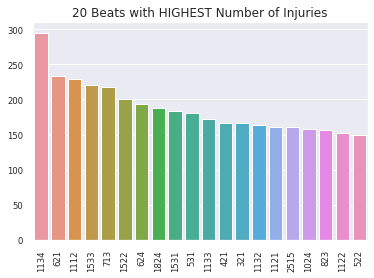

In [159]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(top20_injured.keys()), y = list(top20_injured.values()), order = top20_injured, label = 'small')
ax.set_title('20 Beats with HIGHEST Number of Injuries')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.tick_params(labelsize=8.5)
plt.show()

Now the 20 beats wtih the lowets number of injuries...

In [160]:
#create counter for the 20 beats with lowest number of injuries
low20_injured = {}
for beat in beat_injury.index[-20:]:
    low20_injured[beat] = beat_injury[beat]
print(low20_injured)

{1811: 14, 231: 13, 1235: 11, 1813: 10, 1215: 10, 1225: 10, 1221: 9, 1934: 8, 1935: 7, 1654: 7, 1915: 6, 2131: 6, 215: 5, 121: 5, 1214: 5, 1653: 4, 1621: 3, 4100: 1, 2133: 1, 235: 1}


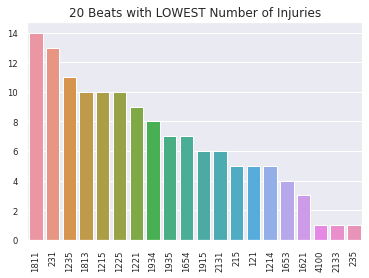

In [161]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(low20_injured.keys()), y = list(low20_injured.values()), order = low20_injured, label = 'small')
ax.set_title('20 Beats with LOWEST Number of Injuries')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.tick_params(labelsize=8.5)
plt.show()

Like we did much earlier, we will sort the beats with the most/least number of injuries by district and cross-reference with the districts we noted earlier for arrests and crime....

In [162]:
#sort above GREATEST counter by district
top20_injured_district = {}
for beat in top20_injured:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in top20_injured_district.keys():
        top20_injured_district[district] += 1
    else:
        top20_injured_district[district] = 1
#print(top20_injured_district)
top20_injured_district_sorted_keys = sorted(top20_injured_district, key=top20_injured_district.get, reverse=True)
top20_injured_district_sort ={}
for district in top20_injured_district_sorted_keys:
    top20_injured_district_sort[district] = top20_injured_district[district]
print(top20_injured_district_sort)

{11: 6, 15: 3, 6: 2, 5: 2, 7: 1, 18: 1, 4: 1, 3: 1, 25: 1, 10: 1, 8: 1}


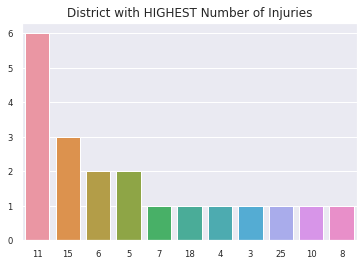

In [163]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(top20_injured_district_sort.keys()), y = list(top20_injured_district_sort.values()), order = top20_injured_district_sort, label = 'small')
ax.set_title('District with HIGHEST Number of Injuries')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

Now the districts with the lowets number of injuries...

In [164]:
#sort above LEAST counter by district
low20_injured_district = {}
for beat in low20_injured:
    last2 = beat%100
    beat = beat - last2
    district = int(beat/100)
    if district in low20_injured_district.keys():
        low20_injured_district[district] += 1
    else:
        low20_injured_district[district] = 1
#print(low20_injured_district)
low20_injured_district_sorted_keys = sorted(low20_injured_district, key=low20_injured_district.get, reverse=True)
low20_injured_district_sort ={}
for district in low20_injured_district_sorted_keys:
    low20_injured_district_sort[district] = low20_injured_district[district]
print(low20_injured_district_sort)

{12: 5, 2: 3, 19: 3, 16: 3, 18: 2, 21: 2, 1: 1, 41: 1}


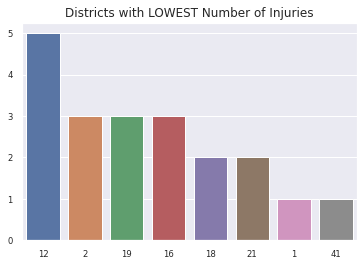

In [165]:
#graph of above counter
sns.set(font_scale = 1)
ax = sns.barplot(x = list(low20_injured_district_sort.keys()), y = list(low20_injured_district_sort.values()), order = low20_injured_district_sort, label = 'small')
ax.set_title('Districts with LOWEST Number of Injuries')
ax.set_xticklabels(ax.get_xticklabels())
ax.tick_params(labelsize=8.5)
plt.show()

In [166]:
print('TOP 20 BEATS IN CRIME, ARREST, RATIO (arrest to crime), AND INJURIES\n')
print('CRIME: ')
print(top20_crime_district_sort)
print('-'*60)
print('ARREST: ')
print(top20_arrest_district_sort)
print('-'*60)
print('RATIO: ')
print(top20_ratio_district_sort)
print('-'*60)
print('INJURIES: ')
print(top20_injured_district_sort)
print('-'*60)

TOP 20 BEATS IN CRIME, ARREST, RATIO (arrest to crime), AND INJURIES

CRIME: 
{15: 4, 4: 3, 6: 3, 8: 2, 5: 2, 11: 2, 25: 1, 3: 1, 7: 1, 10: 1}
------------------------------------------------------------
ARREST: 
{11: 6, 15: 5, 25: 2, 4: 2, 10: 1, 6: 1, 3: 1, 7: 1, 8: 1}
------------------------------------------------------------
RATIO: 
{11: 11, 15: 5, 1: 1, 21: 1, 18: 1, 10: 1}
------------------------------------------------------------
INJURIES: 
{11: 6, 15: 3, 6: 2, 5: 2, 7: 1, 18: 1, 4: 1, 3: 1, 25: 1, 10: 1, 8: 1}
------------------------------------------------------------


In [167]:
print('BOTTOM 20 BEATS IN CRIME, ARREST, RATIO (arrest to crime), AND INJURIES\n')
print('CRIME: ')
print(low20_crime_district_sort)
print('-'*60)
print('ARREST: ')
print(low20_arrest_district_sort)
print('-'*60)
print('RATIO: ')
print(low20_ratio_district_sort)
print('-'*60)
print('INJURIES: ')
print(low20_injured_district_sort)
print('-'*60)

BOTTOM 20 BEATS IN CRIME, ARREST, RATIO (arrest to crime), AND INJURIES

CRIME: 
{12: 6, 19: 4, 16: 4, 2: 3, 1: 2, 4: 1}
------------------------------------------------------------
ARREST: 
{12: 5, 19: 5, 16: 4, 2: 2, 1: 2, 18: 1, 4: 1}
------------------------------------------------------------
RATIO: 
{19: 5, 16: 5, 12: 2, 18: 2, 24: 1, 14: 1, 4: 1, 23: 1, 13: 1, 2: 1}
------------------------------------------------------------
INJURIES: 
{12: 5, 2: 3, 19: 3, 16: 3, 18: 2, 21: 2, 1: 1, 41: 1}
------------------------------------------------------------


Key Takeaways:
* Like in the analysis of the arrest, crime, and ratio data by district, we see the same districts are prevelant in the injury data:
    * Districts 11, 15, 6, and 5 (even 8) all have beats in the top 20 of all 4 categories
    * Districts 12, 19, 16, and 2  all have beats in the bottom 20 of all 4 categories
* This shouldn't really be surprising, as the beats with the most amount of crimes will naturally have more arrests and likely have more instances of injury due to the greater volume of crimes and subsequent police presence.
* We can use the relevant geogprahical data (once obtained) to add some more context to our data, but my initial hypothesis is that the inclusion of demographic data via location will NOT be at ends with our previous findings on race across all TRR incidents

In [168]:
outF = open("outputBeats_EDA_TOP.txt", "w")

In [169]:
df_beat_crime = df_beat.sort_values(by = 'number_of_reported_crimes', ascending = False)
df_beat_crime.head(20)

,beat,number_of_reported_crimes,arrests_by_beat,arrest_to_crime_ratio
0,423,31784,9912,0.311855
1,421,30970,9968,0.321860
2,624,28946,10451,0.361052
3,1533,28633,15282,0.533720
4,823,27745,8754,0.315516
5,511,27279,7120,0.261007
6,1112,26929,14231,0.528464
7,1522,26615,13453,0.505467
8,2533,26351,12648,0.479982
9,414,25649,6398,0.249444


In [170]:
outF.write("T20 Crimes: \n")
for ind in df_beat_crime.index[:20]:
    beat = str(df_beat_crime['beat'][ind])
    outF.write(beat+" ")
outF.write('\n')

1

In [171]:
df_beat_arrests = df_beat.sort_values(by = 'arrests_by_beat', ascending = False)
df_beat_arrests.head(20)

,beat,number_of_reported_crimes,arrests_by_beat,arrest_to_crime_ratio
3,1533,28633,15282,0.533720
6,1112,26929,14231,0.528464
7,1522,26615,13453,0.505467
16,1532,23779,12758,0.536524
8,2533,26351,12648,0.479982
18,1531,23002,12606,0.548039
19,1122,22852,11678,0.511027
17,1011,23463,11373,0.484721
40,1113,19996,10828,0.541508
24,1121,22025,10580,0.480363


In [172]:
outF.write("T20 Arrests: \n")
for ind in df_beat_arrests.index[:20]:
    beat = str(df_beat_arrests['beat'][ind])
    outF.write(beat+" ")
outF.write('\n')

1

In [173]:
df_beat_ratio = df_beat.sort_values(by = 'arrest_to_crime_ratio', ascending = False)
df_beat_ratio.head(20)

,beat,number_of_reported_crimes,arrests_by_beat,arrest_to_crime_ratio
181,134,11748,6965,0.592867
168,1114,12060,6886,0.570978
219,2113,9630,5487,0.569782
18,1531,23002,12606,0.548039
40,1113,19996,10828,0.541508
86,1115,16106,8708,0.540668
16,1532,23779,12758,0.536524
3,1533,28633,15282,0.533720
6,1112,26929,14231,0.528464
76,1134,16706,8659,0.518317


In [174]:
outF.write("T20 Ratio: \n")
for ind in df_beat_ratio.index[:20]:
    beat = str(df_beat_ratio['beat'][ind])
    outF.write(beat+" ")
outF.write('\n')

1

In [175]:
outF.write("T20 Ratio: \n")
for beat in top20_injured.keys():
    beat = str(beat)
    outF.write(beat+" ")
outF.write('\n')

1

In [176]:
from IPython.display import FileLink
FileLink(r'outputBeats_EDA_TOP.txt')

/kaggle/working/outputBeats_EDA_TOP.txt